In [1]:
#importing the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Tanweer-Raza/data_set_for_project/main/Telco-Customer-Churn.csv")

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [5]:
df.shape

(7043, 21)

##### Checking data types

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#Converting Total charges object type column into numeric type or int type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors='coerce')  # IHere ‘coerce’, then invalid parsing will be set as NaN.

##### Checking Null Values

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Here Total charges having 11 missing values so we will remove those rows as these are less in numbers so removing won't affect the analysis.

In [9]:
data = df.copy()

In [10]:
# Removing missing values
data.dropna(inplace = True)

In [11]:
data[["MonthlyCharges","tenure"]].describe()

MonthlyCharges       tenure
count     7032.000000  7032.000000
mean        64.798208    32.421786
std         30.085974    24.545260
min         18.250000     1.000000
25%         35.587500     9.000000
50%         70.350000    29.000000
75%         89.862500    55.000000
max        118.750000    72.000000

- On average, customer  pay monthly $64.79 for the services and the most expensive monthly charge is $118.75.
- The cheapest monthly charge is $18.25.
- Average tennure is near 32 months . Minm tennure is 1 month only. The maximum tennure is 72 months i.e 6 years.
- 75% customers have tenure less than 55 months

#### Divinding Customers into bins based on tenure

In [12]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [13]:
data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

#### Removing irrelevant columns

In [14]:
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

## Data Exploration:


#### Univariate Analysis

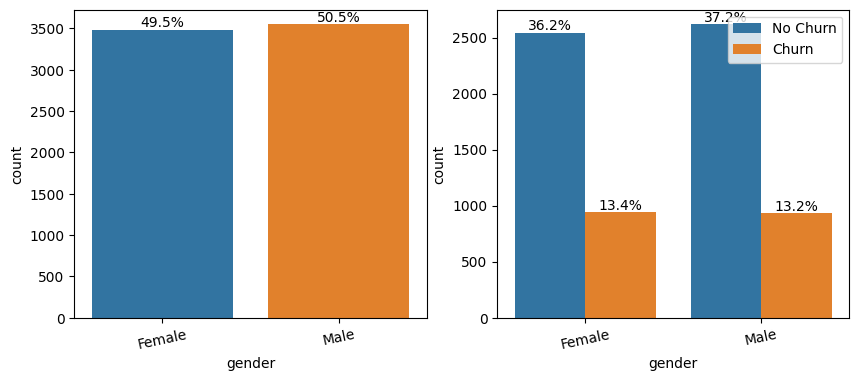

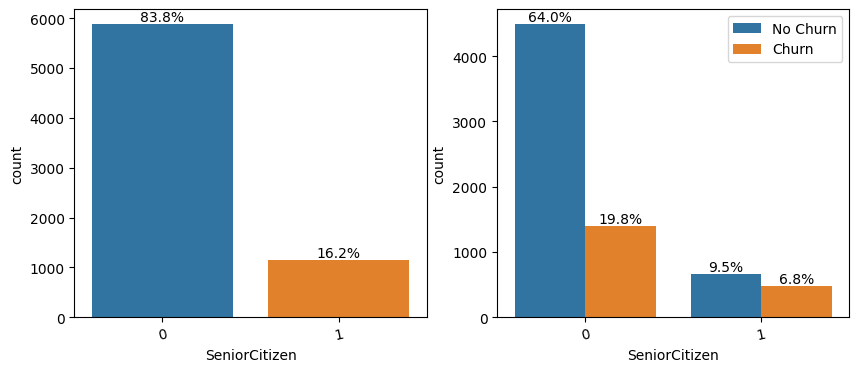

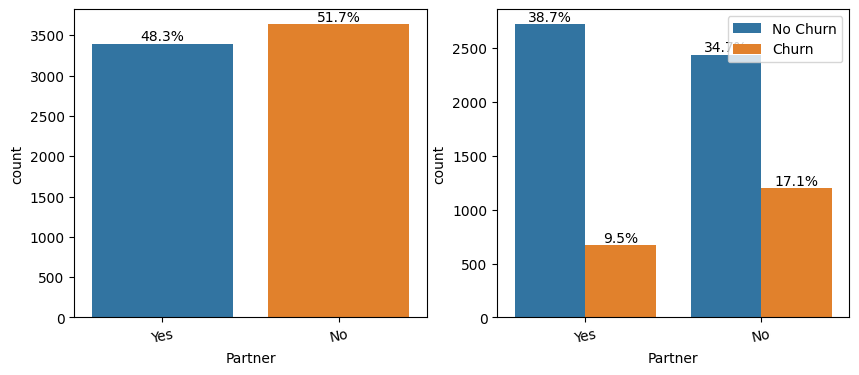

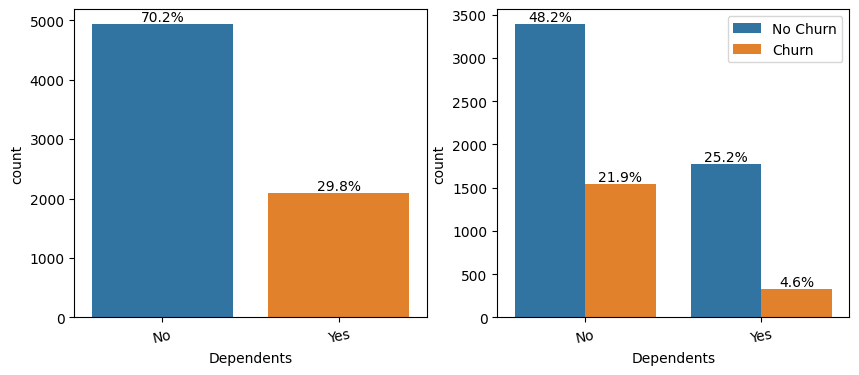

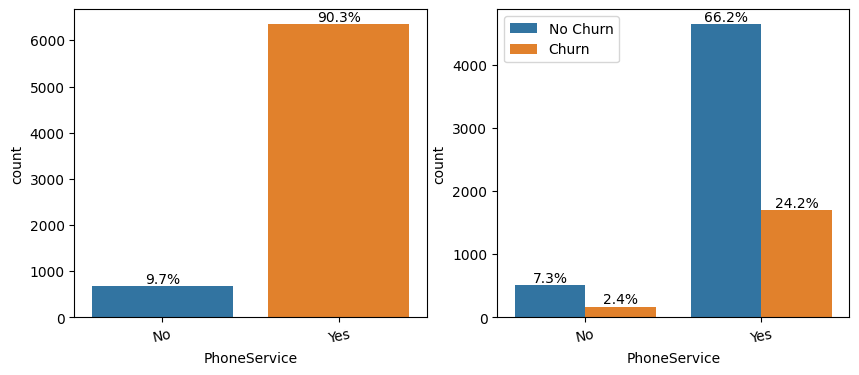

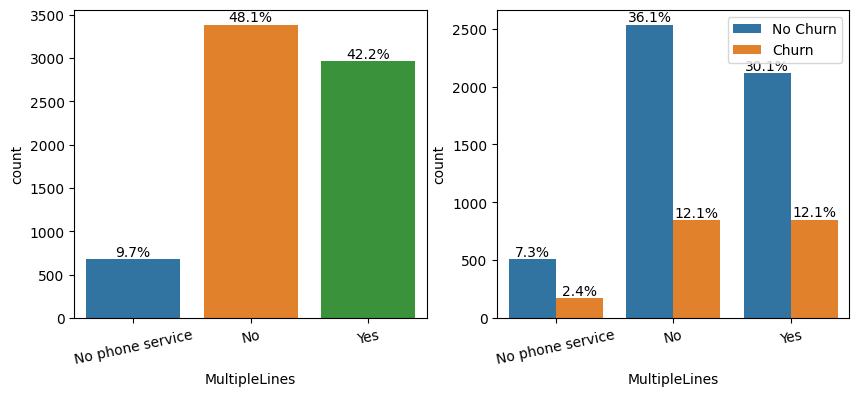

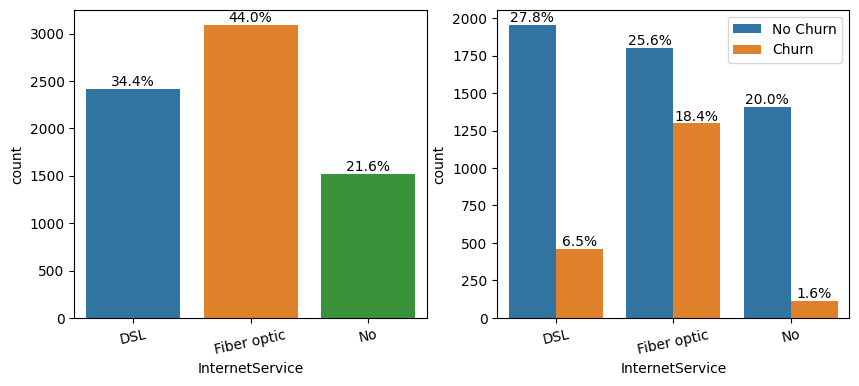

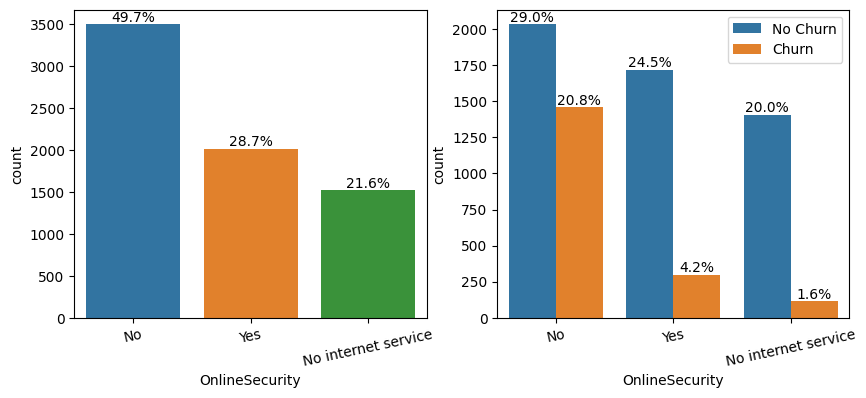

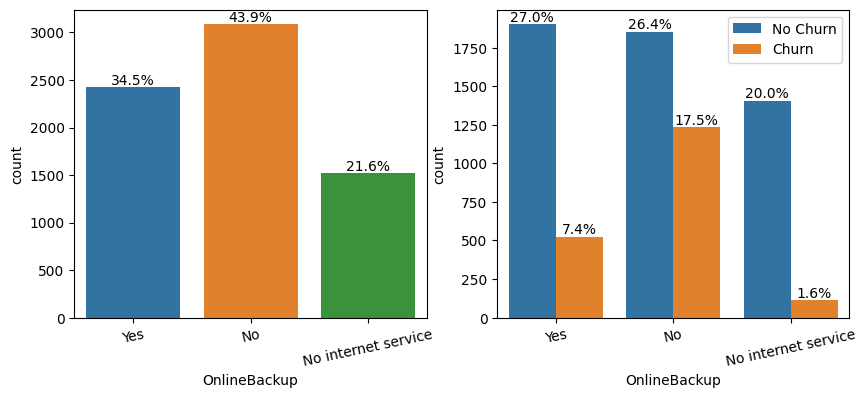

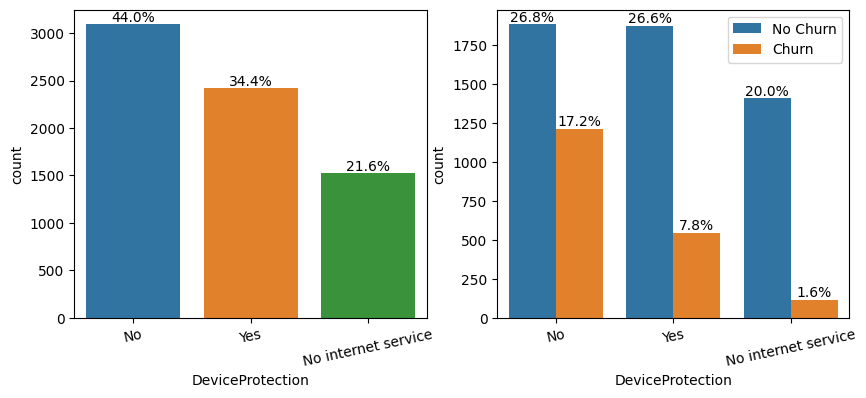

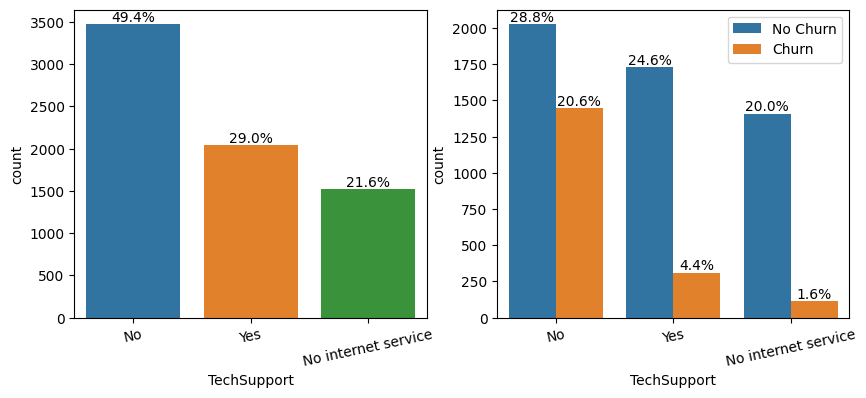

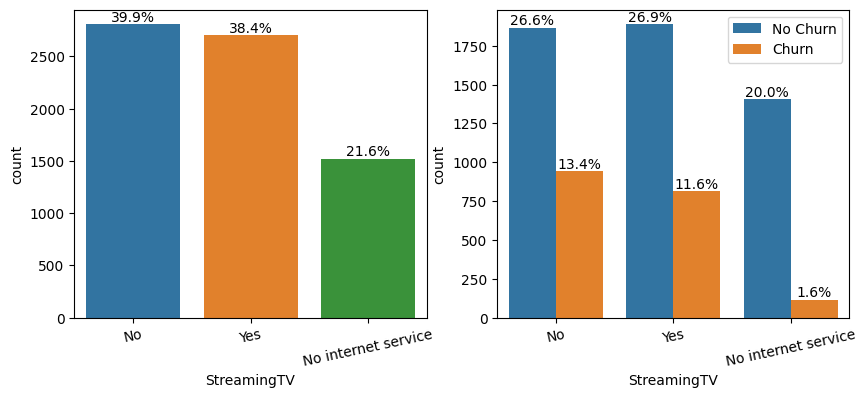

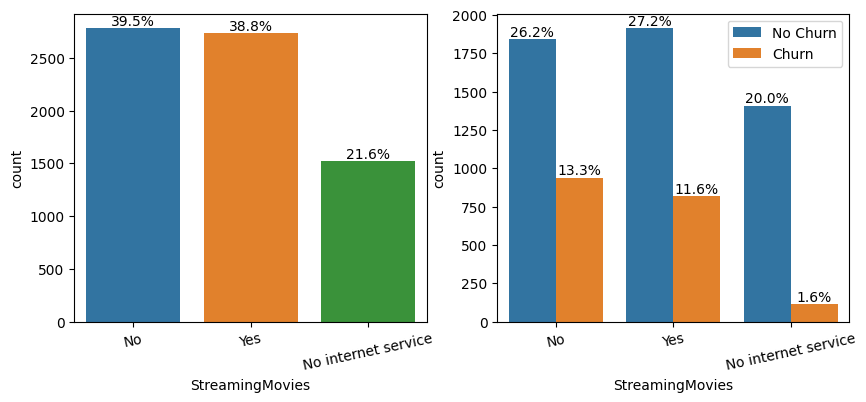

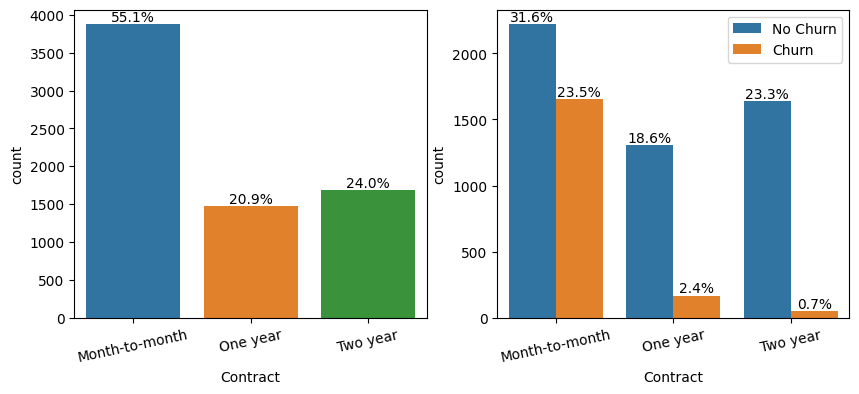

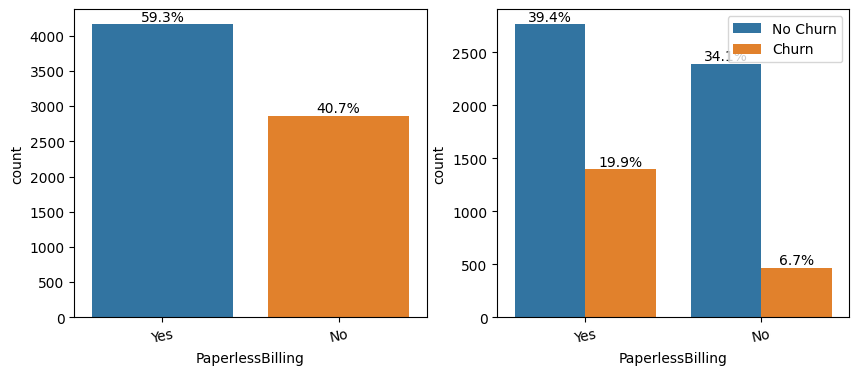

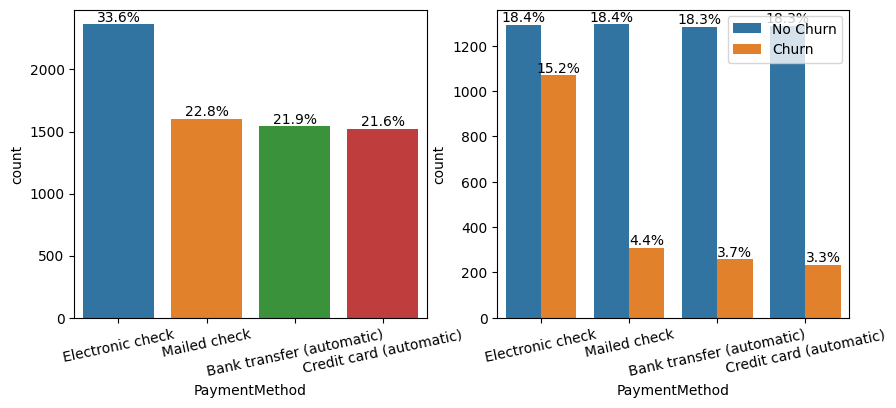

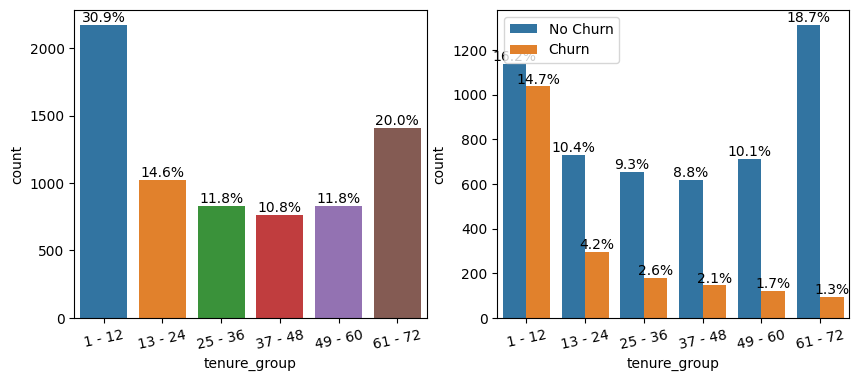

In [15]:
for i , col in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])) :
    fig, ax = plt.subplots(1,2,sharex=True,figsize=(10,4))
    # plt.figure(i, figsize=(6,4))
    # plt.xticks(rotation = 15)
    ax1 = sns.countplot(ax = ax[0], data = data, x=col )
    ax2 = sns.countplot(ax = ax[1] , data = data, x=col, hue = 'Churn')
    
    ax2.legend(["No Churn","Churn"])
    
    ax1.tick_params('x', labelrotation=12)
    ax2.tick_params('x', labelrotation=12)

    # add annotations
    for c in ax1.containers:
        labels = [f'{v.get_height()/data.Churn.count()*100:0.1f}%' for v in c]
        ax1.bar_label(c, labels=labels, label_type='edge')

    for c in ax2.containers:
        labels = [f'{v.get_height()/data.Churn.count()*100:0.1f}%' for v in c]
        ax2.bar_label(c, labels=labels, label_type='edge')


    plt.show()

Text(0, 0.5, 'Total Charges')

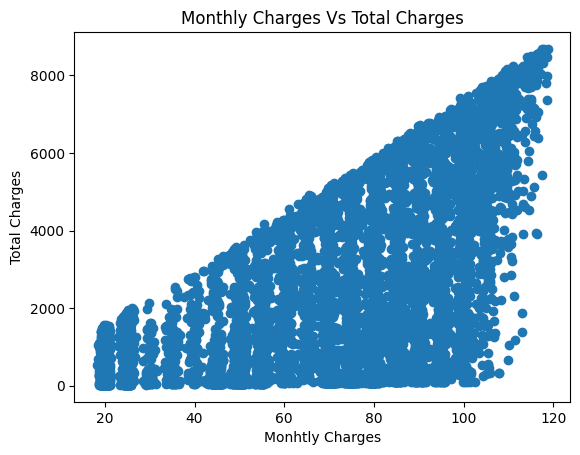

In [16]:
#Relationship between Monthly Charges and Total Charges
plt.plot(data['MonthlyCharges'], data['TotalCharges'], 'o')
plt.title("Monthly Charges Vs Total Charges")
plt.xlabel('Monhtly Charges')
plt.ylabel('Total Charges')

**Insight:** Total Charges increase as Monthly Charges increase - as expected.

Text(0.5, 1.0, 'Total charges by churn')

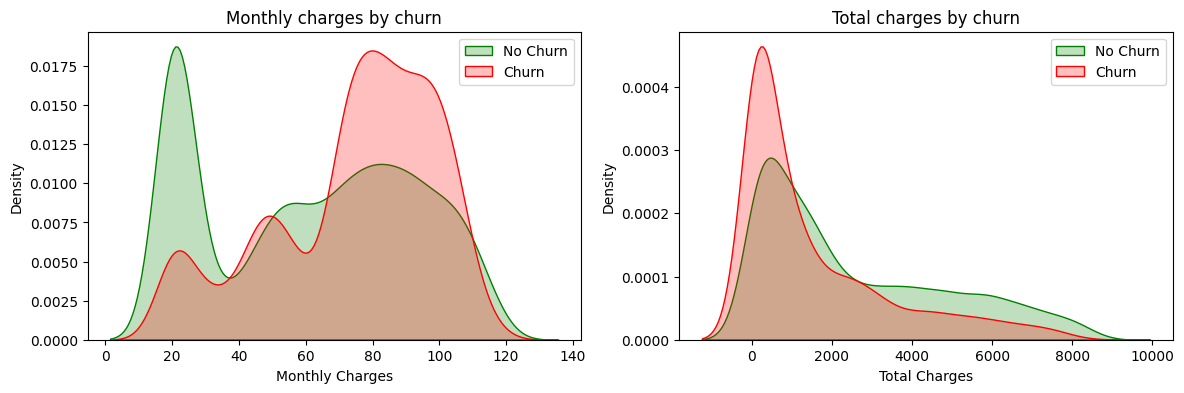

In [50]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
Mth_ch = sns.kdeplot(ax = ax[0], data = data.MonthlyCharges[(data["Churn"] == 0) ],
                color="green", fill = True)
Mth_ch = sns.kdeplot(ax = ax[0], data = data.MonthlyCharges[(data["Churn"] == 1) ],
                 color="red", fill= True)
                 

Mth_ch.legend(["No Churn","Churn"],loc='upper right')
Mth_ch.set_ylabel('Density')
Mth_ch.set_xlabel('Monthly Charges')
Mth_ch.set_title('Monthly charges by churn')


Tot_ch = sns.kdeplot(ax = ax[1], data = data.TotalCharges[(data["Churn"] == 0) ],
                color="green", fill = True)
Tot_ch = sns.kdeplot(ax = ax[1], data = data.TotalCharges[(data["Churn"] == 1) ],
                color="red", fill= True)
Tot_ch.legend(["No Churn","Churn"])
Tot_ch.set_ylabel('Density')
Tot_ch.set_xlabel('Total Charges')
Tot_ch.set_title('Total charges by churn')

**Insight:** 
- Churn is high when Monthly Charges are high.
- Higher Churn is at lower Total Charges which is quite surprising.

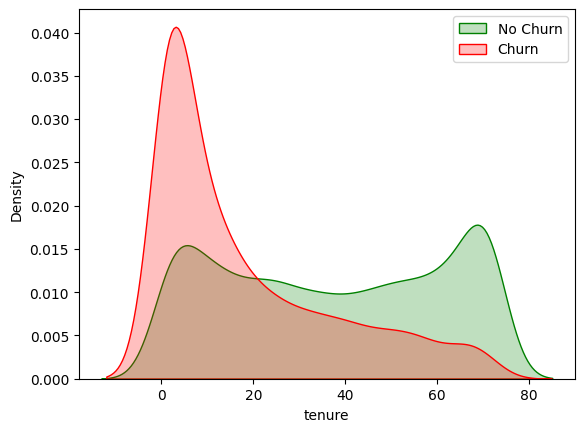

In [18]:
tenure = sns.kdeplot(data = df.tenure[(df["Churn"] == "No") ],
                color="green", fill = True)
tenure = sns.kdeplot(data = df.tenure[(df["Churn"] == "Yes") ],
                color="red", fill = True)
tenure.legend(["No Churn","Churn"])

**Insight** : 

more likely to leave company who’s tenure is less than a year

more likely to churn who has more than approximately Rs 65 monthly charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

maximum churn customers belongs to Low tenure(<20) and High Monthly Charges (>65) but low Total charges.

##### Convertin the target variable into a binary numeric variable and all categorical variables into dummy variables

In [19]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)

In [20]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0           29.85         29.85      0              1   
1              0           56.95       1889.50      0              0   
2              0           53.85        108.15      1              0   
3              0           42.30       1840.75      0              0   
4              0           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0            0           0            1              1               0   
1            1           1            0              1               0   
2            1           1            0              1               0   
3            1           1            0              1               0   
4            0           1            0              1               0   

   PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0                1                 0                 0   
1                0                 1                 1   
2                0                 1                 1   
3                1                 0                 0   
4                0                 1                 1   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                               1                  0                    1   
1                               0                  0                    1   
2                               0                  0                    1   
3                               1                  0                    1   
4                               0                  0                    0   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                            0                   0                  1   
1                            0                   0                  0   
2                            0                   0                  0   
3                            0                   0                  0   
4                            1                   0                  1   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                   0                   0                0   
1                                   0                   1                1   
2                                   0                   1                0   
3                                   0                   1                1   
4                                   0                   0                1   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                                 0                 1                    1   
1                                 0                 0                    0   
2                                 0                 1                    1   
3                                 0                 0                    0   
4                                 0                 0                    1   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                     0                     0               1   
1                                     0                     1               1   
2                                     0                     0               1   
3                                     0                     1               0   
4                                     0                     0               1   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                0                0               1   
1                                0                0               1   
2                                0                0               1   
3                                0                1               1   
4                                0                0               1   

   StreamingTV_No inte

<AxesSubplot:>

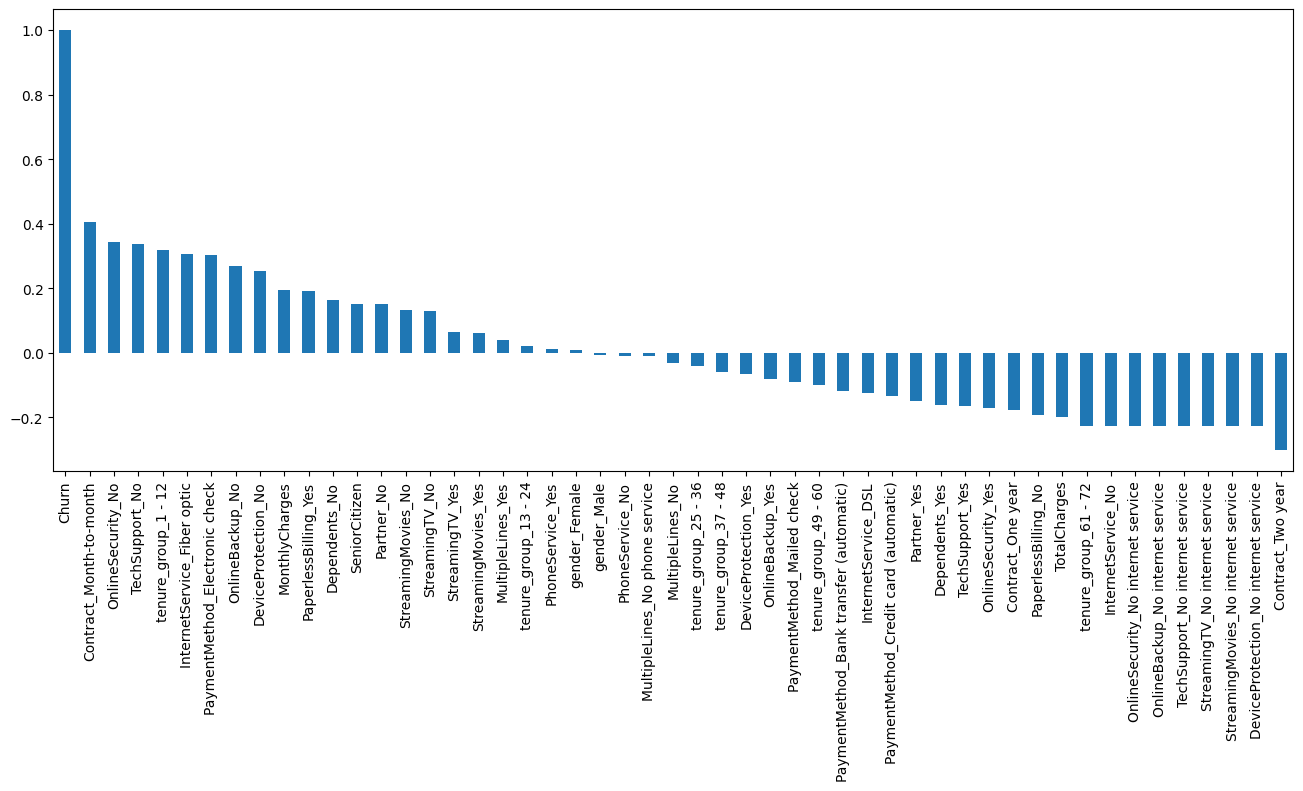

In [21]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(16,6))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

__From above Correlation plot of churn feature with other features , Following things are observed :__
- Monthly contract, No onlinSecurity, No TechSupport positively co-related with churn. i.e **HIGH** Churn seen.
- While tenure, two year contract with no internetService are negatively co-relted with churn.
- Also services such as streaming tv and movies, online security, online backup, tech support, 
device protection without internet service are negatively co-related to churn. i.e **LOW** Churn is seen.
- Factors like **Gender**, **Availability of PhoneService** and **no. of multiple lines** have alomost **NO** impact on Churn
This is also evident from the **Heatmap** below.

<AxesSubplot:>

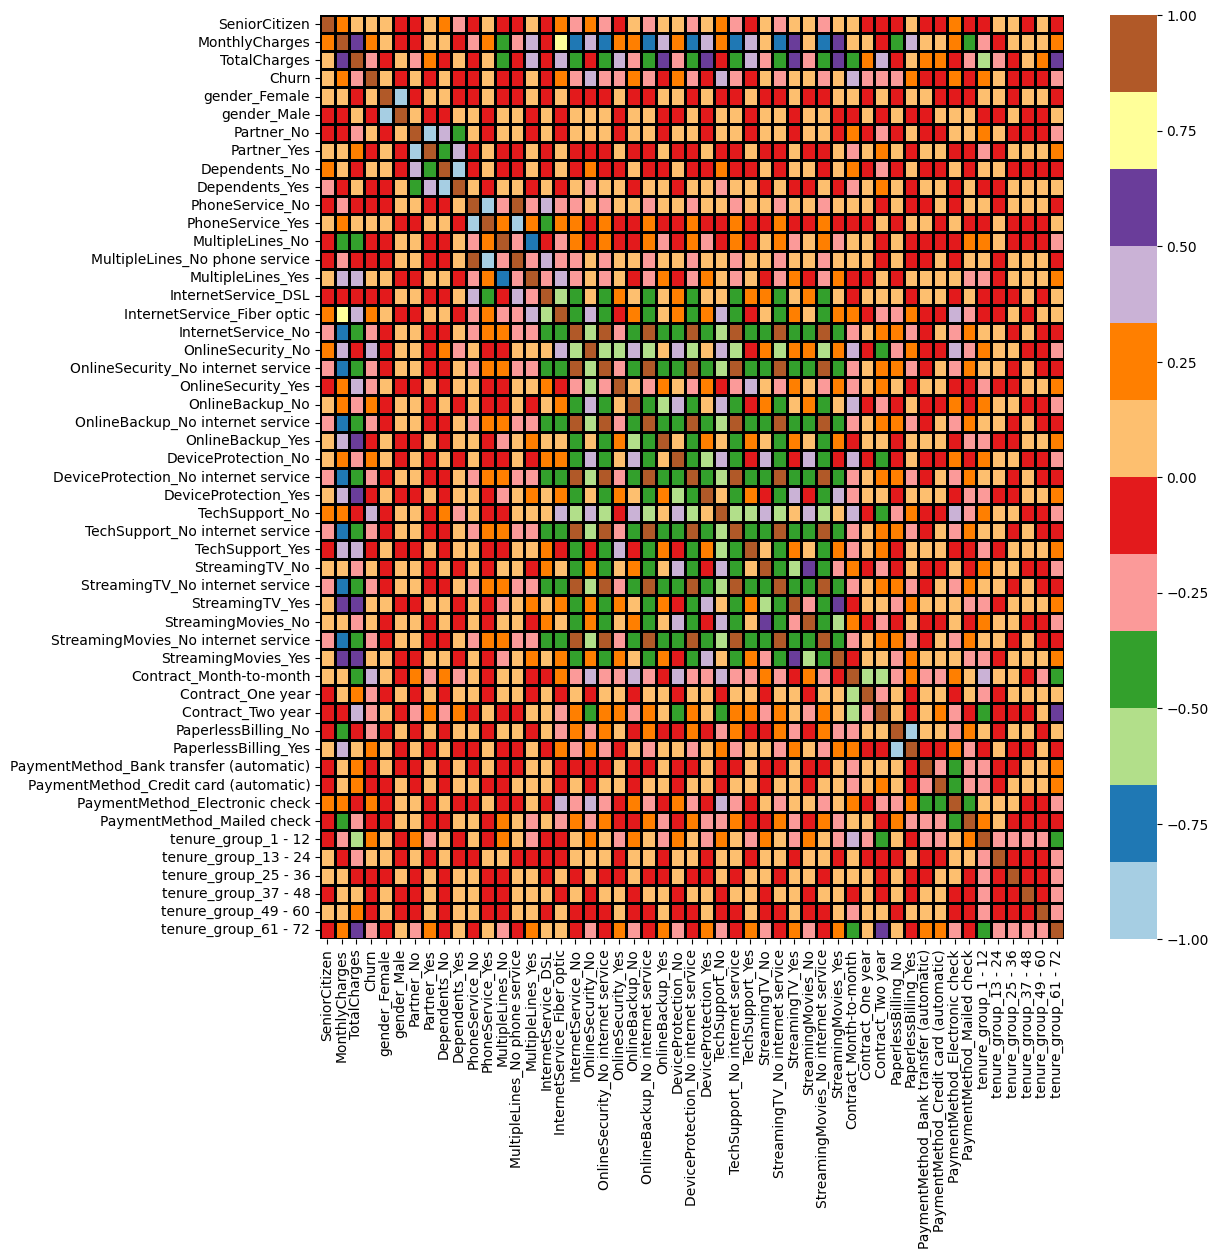

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired", linewidths=0.8, linecolor="black")

In [23]:
correlation = data_dummies.corr()['Churn'].sort_values(ascending = False).round(2)
correlation

Churn                                      1.00
Contract_Month-to-month                    0.40
OnlineSecurity_No                          0.34
TechSupport_No                             0.34
tenure_group_1 - 12                        0.32
InternetService_Fiber optic                0.31
PaymentMethod_Electronic check             0.30
OnlineBackup_No                            0.27
DeviceProtection_No                        0.25
MonthlyCharges                             0.19
PaperlessBilling_Yes                       0.19
Dependents_No                              0.16
SeniorCitizen                              0.15
Partner_No                                 0.15
StreamingMovies_No                         0.13
StreamingTV_No                             0.13
StreamingTV_Yes                            0.06
StreamingMovies_Yes                        0.06
MultipleLines_Yes                          0.04
tenure_group_13 - 24                       0.02
PhoneService_Yes                        

##### Top positively correlated attributes with the Churn

Index(['Churn', 'Contract_Month-to-month', 'OnlineSecurity_No',
       'TechSupport_No', 'tenure_group_1 - 12', 'InternetService_Fiber optic',
       'PaymentMethod_Electronic check', 'OnlineBackup_No',
       'DeviceProtection_No', 'MonthlyCharges'],
      dtype='object')


<AxesSubplot:>

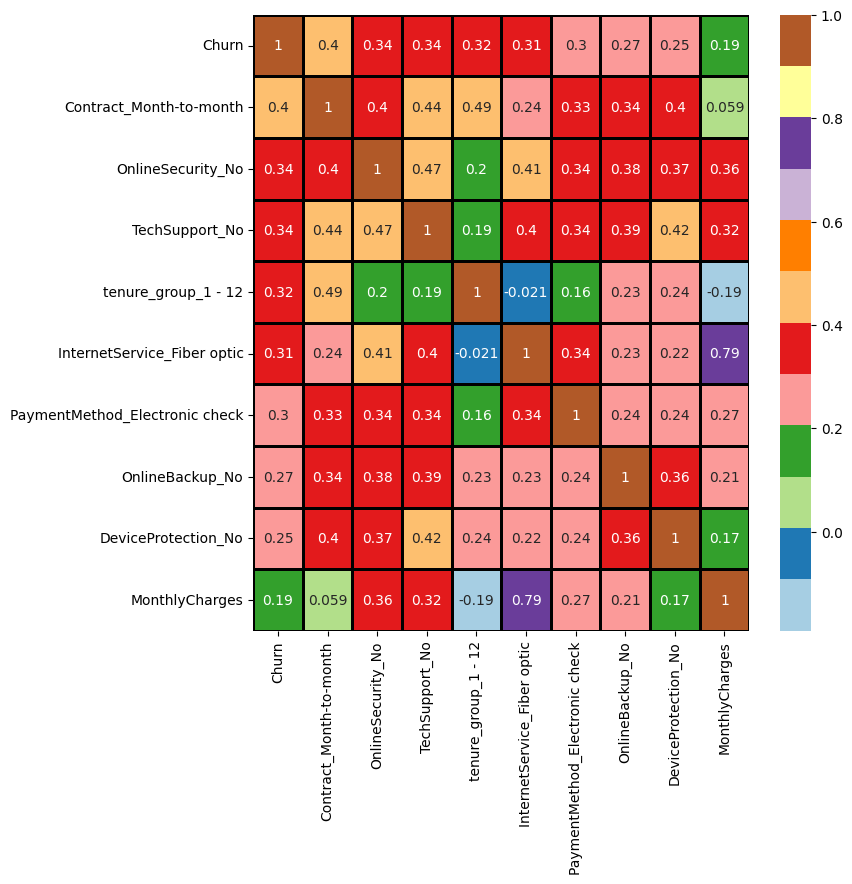

In [24]:
k = 10
correl = data_dummies.corr()
cols = correl.nlargest(k, 'Churn', keep= "all").index
print(cols)
cm = data_dummies[cols].corr()

plt.figure(figsize=(8,8))
sns.heatmap(cm, cmap="Paired", linewidths=0.8, linecolor="black", annot=True, xticklabels=cols.values , yticklabels=cols.values)

##### Top Negatively correlated attributes with the Churn

Index(['Contract_Two year', 'InternetService_No',
       'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'tenure_group_61 - 72',
       'TotalCharges'],
      dtype='object')


<AxesSubplot:>

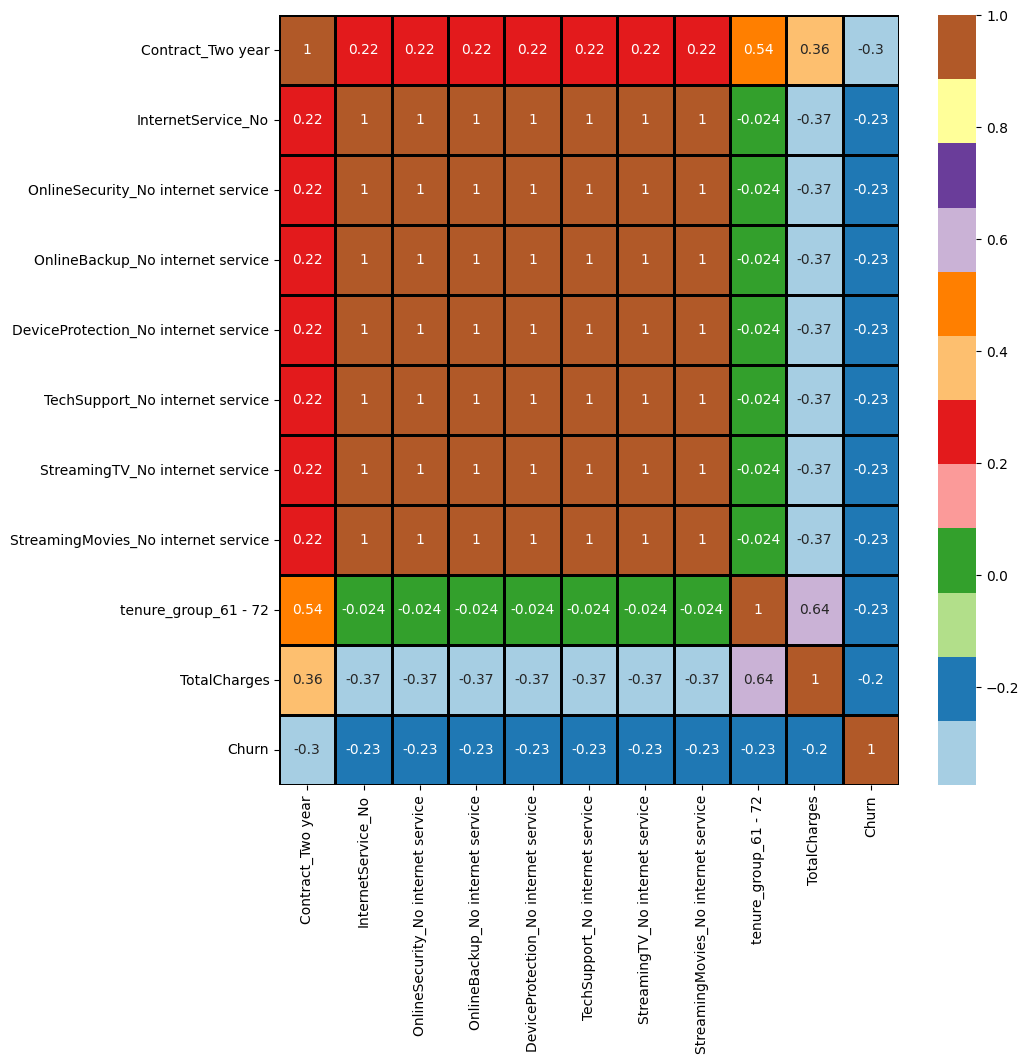

In [25]:
k = 10
correl = data_dummies.corr().round(2)
cols = correl.nsmallest(k, 'Churn').index
print(cols)
cm = pd.concat([data_dummies[cols], data_dummies["Churn"]], axis=1).corr()

plt.figure(figsize=(10,10))
sns.heatmap(cm, cmap="Paired", linewidths=0.8, linecolor="black", annot=True)

#### Bivariate Analysis

In [28]:
churned_data=data.loc[data["Churn"]==0]
non_churned_data=data.loc[data["Churn"]==1]

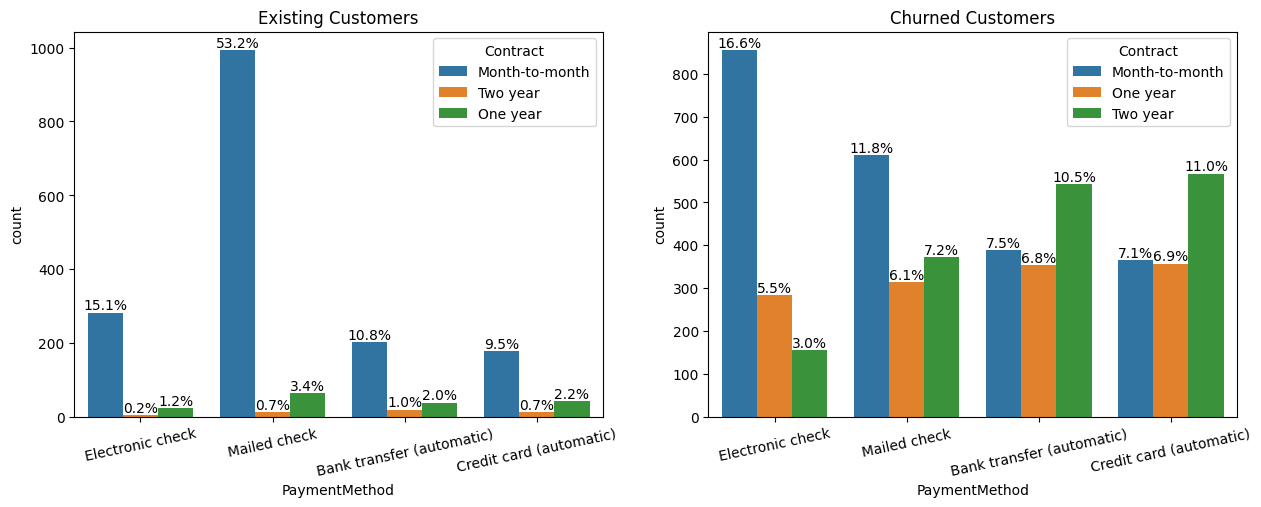

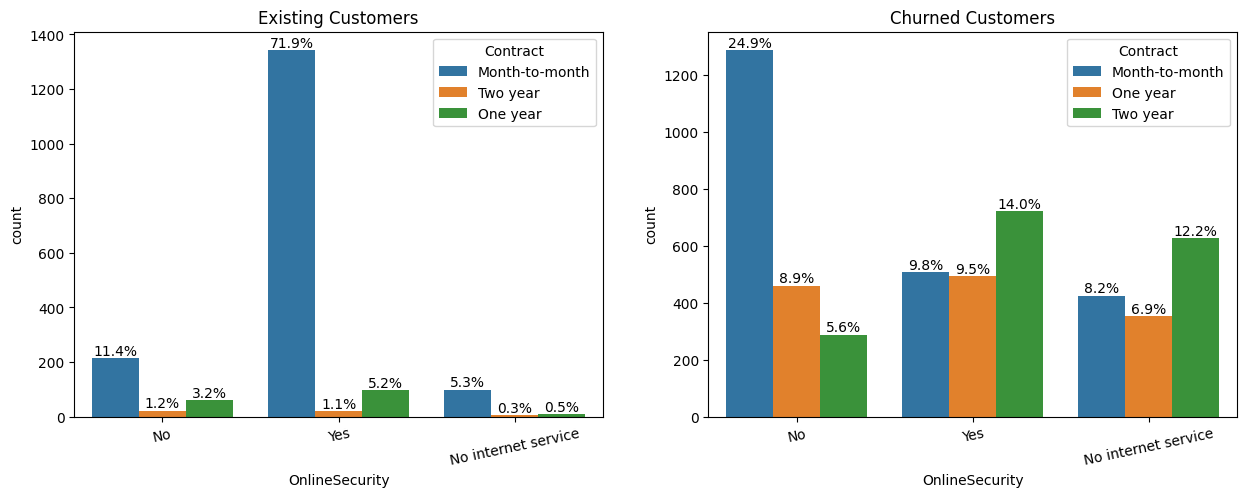

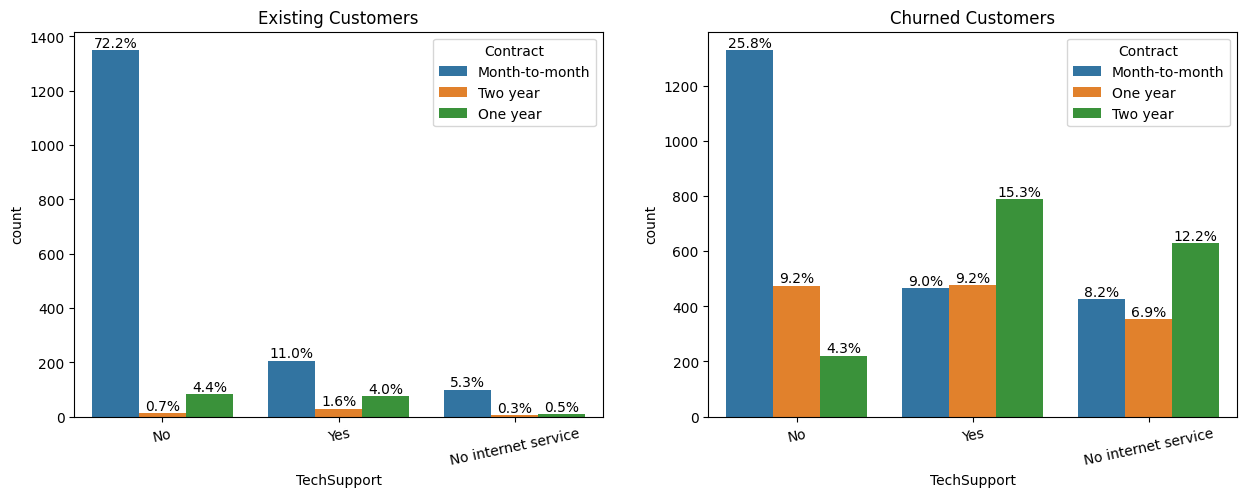

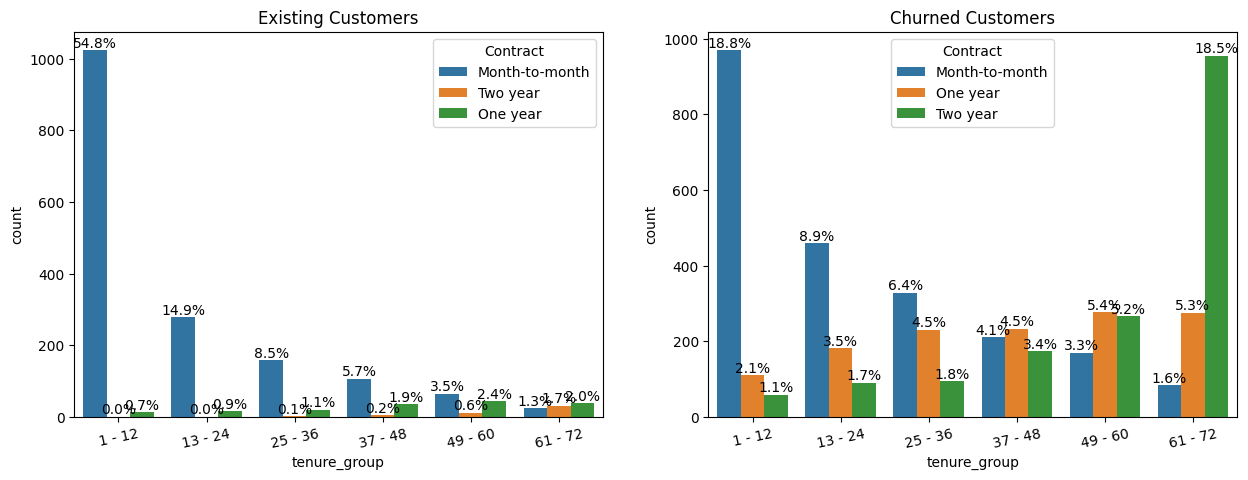

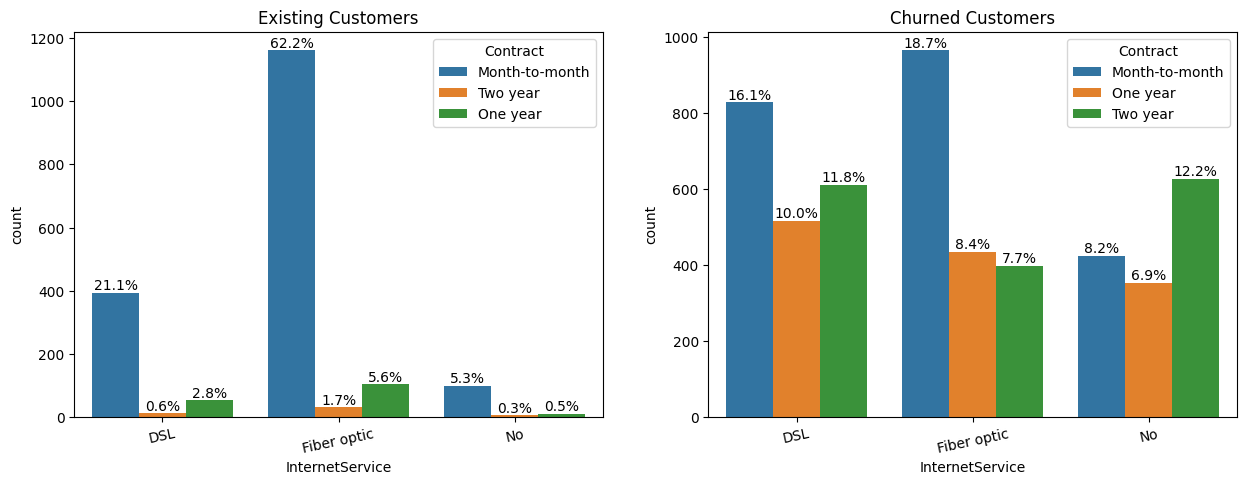

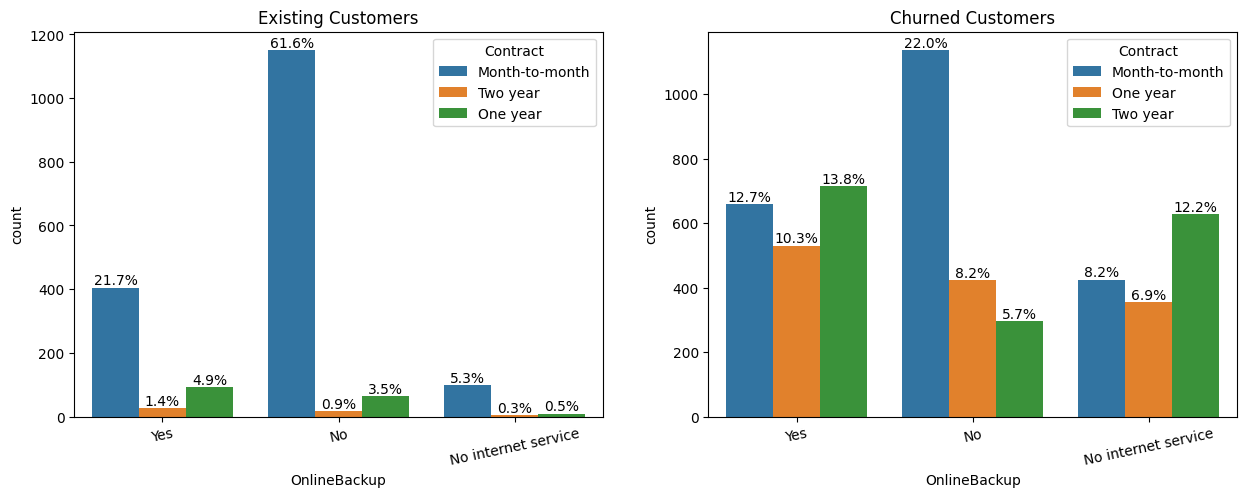

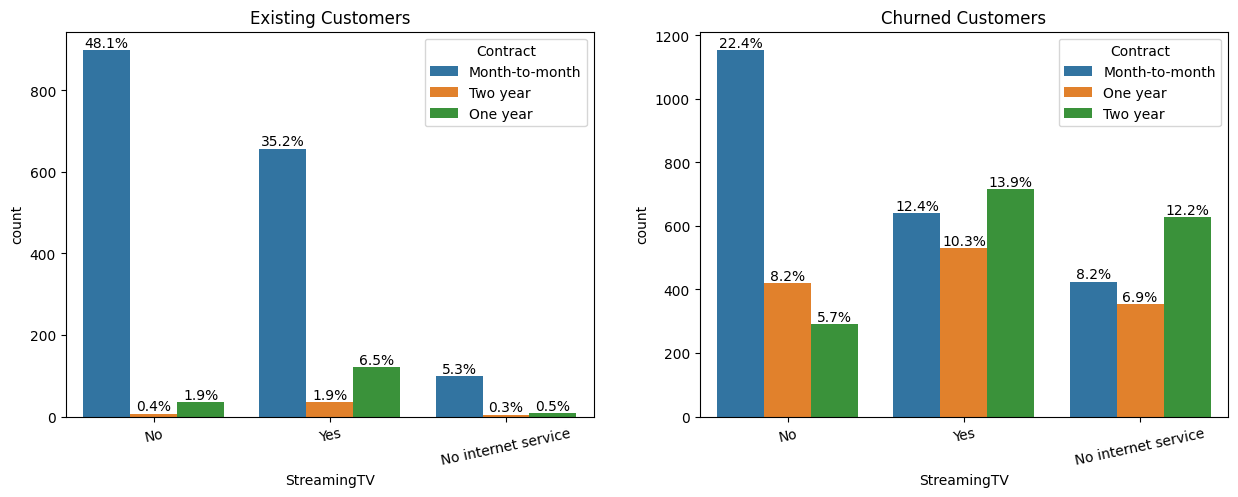

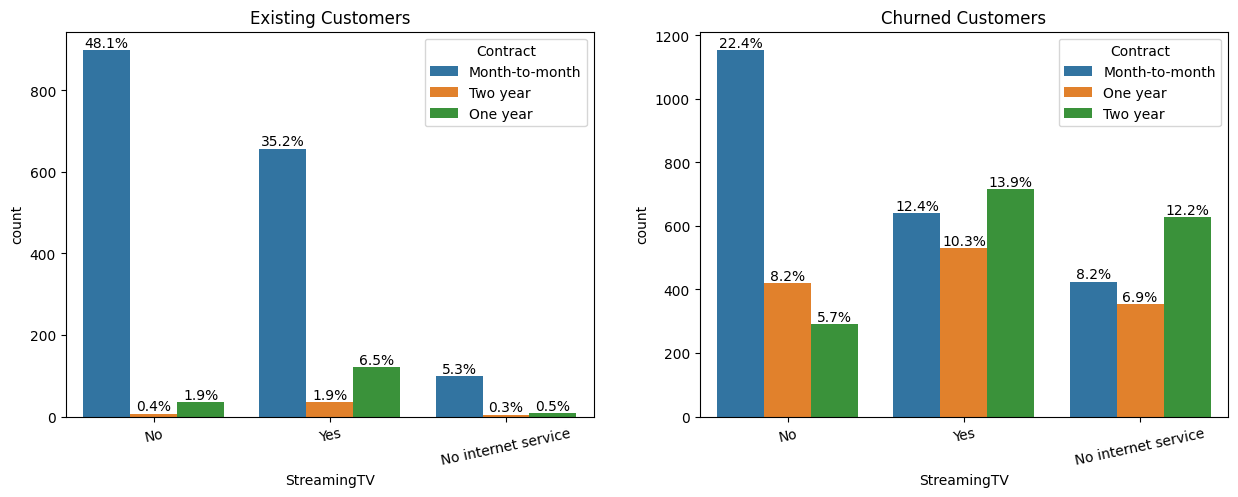

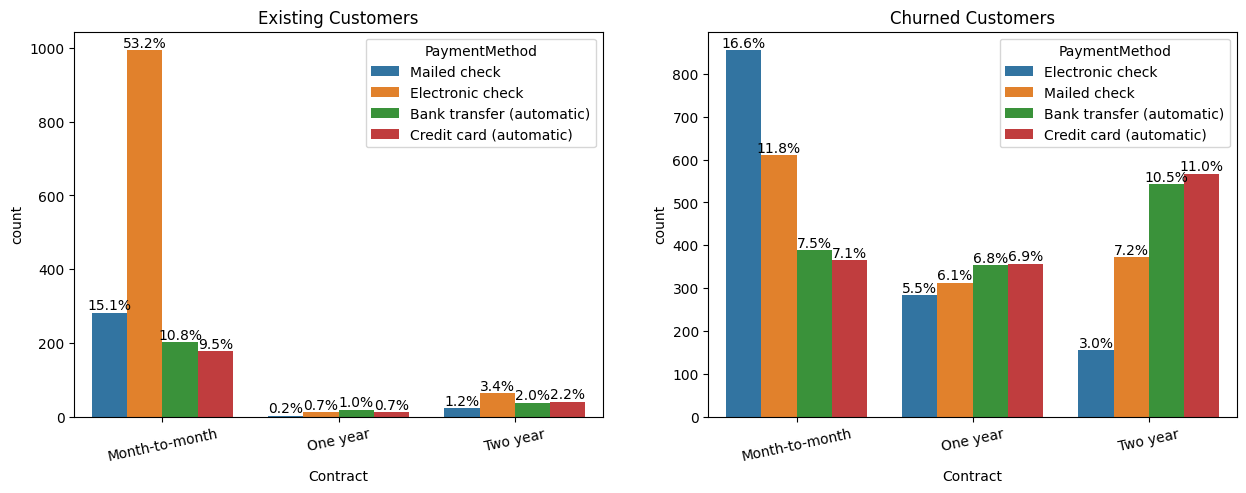

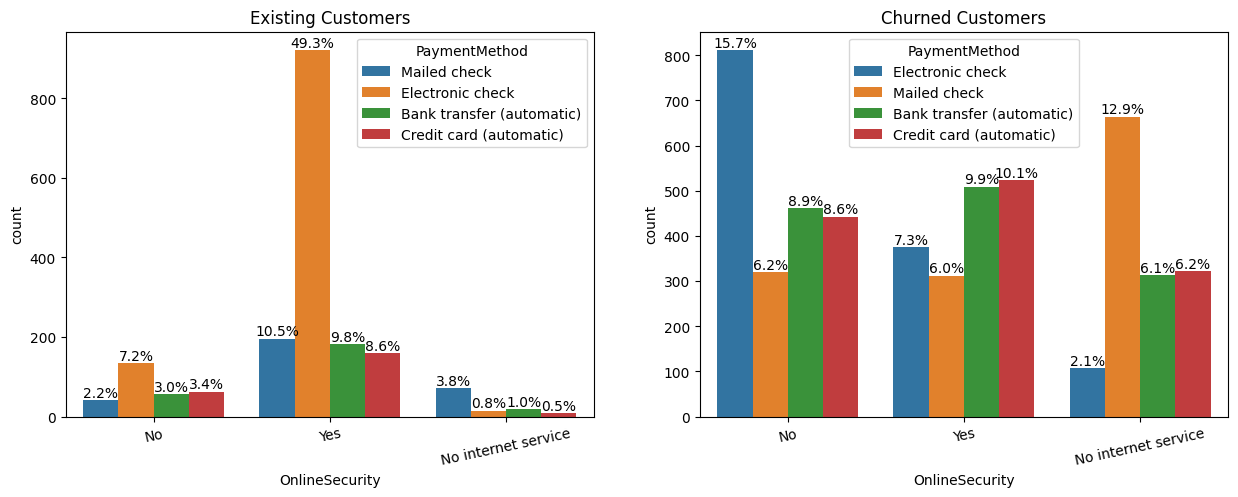

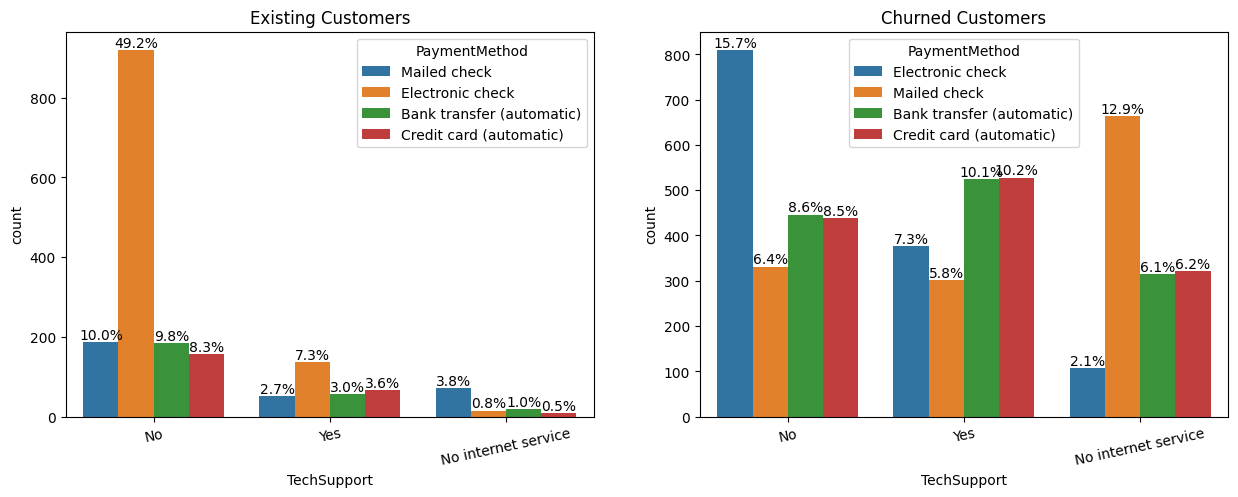

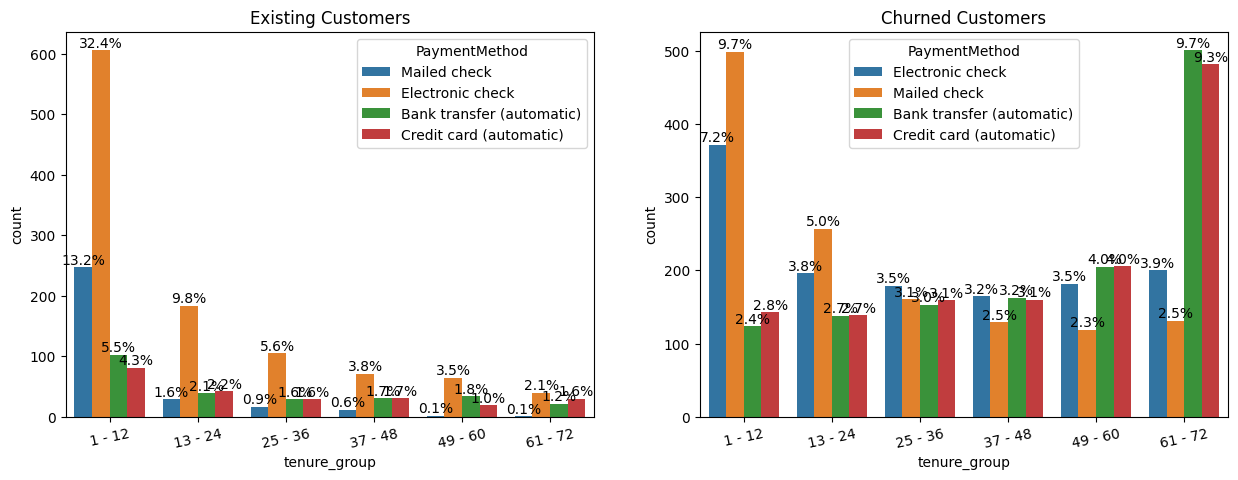

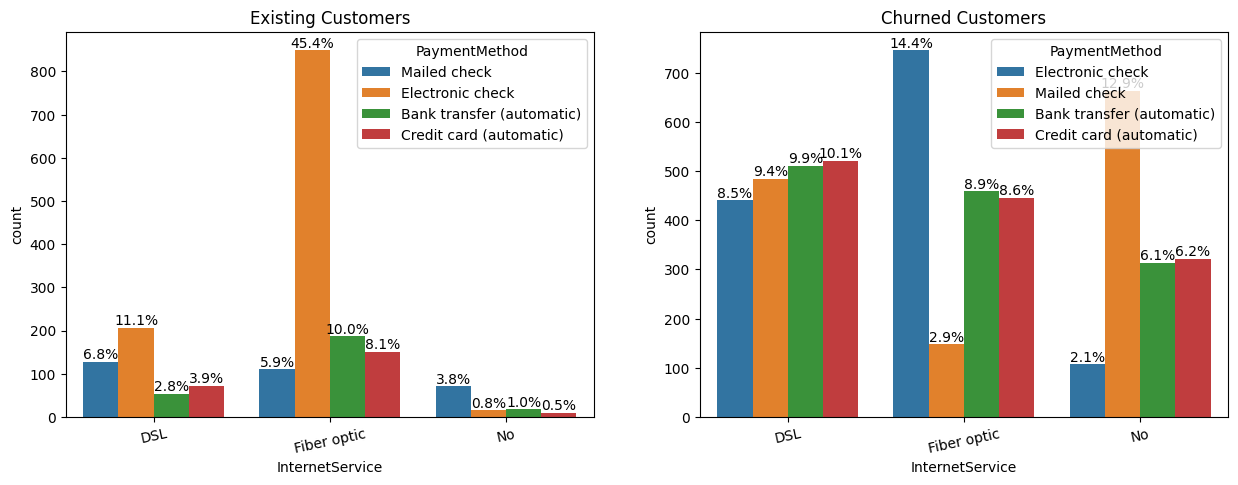

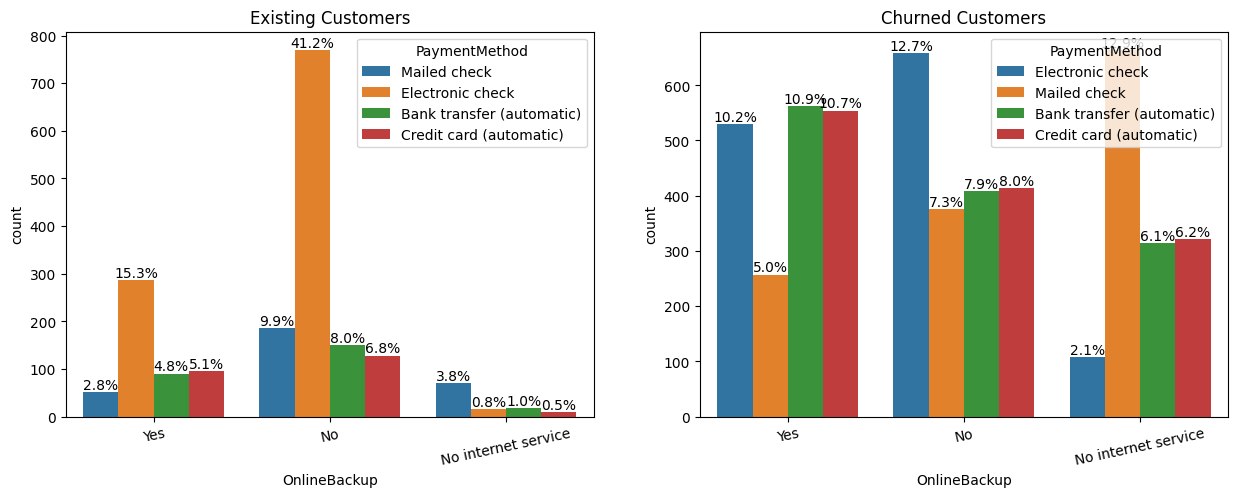

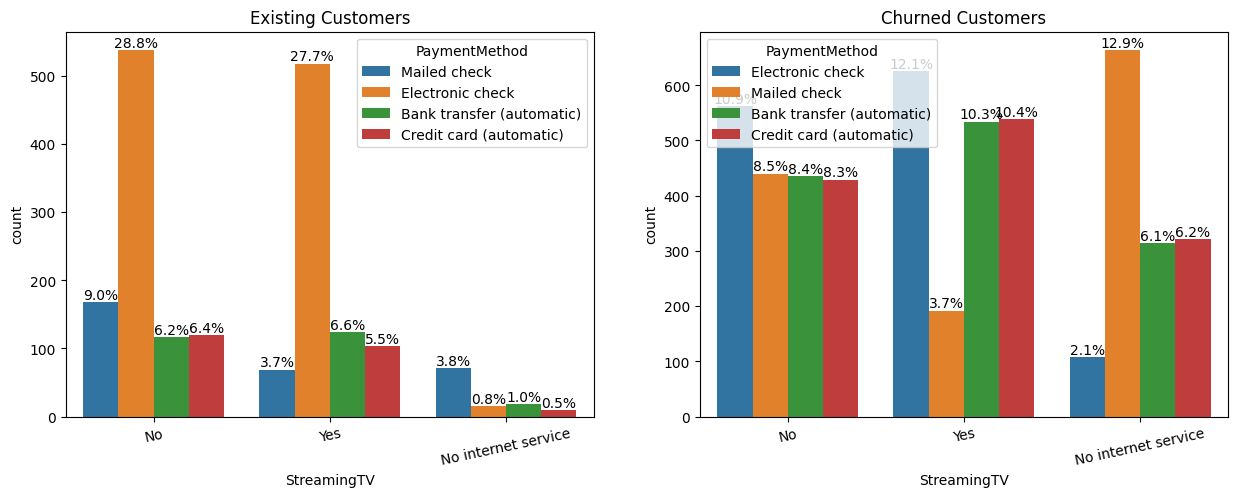

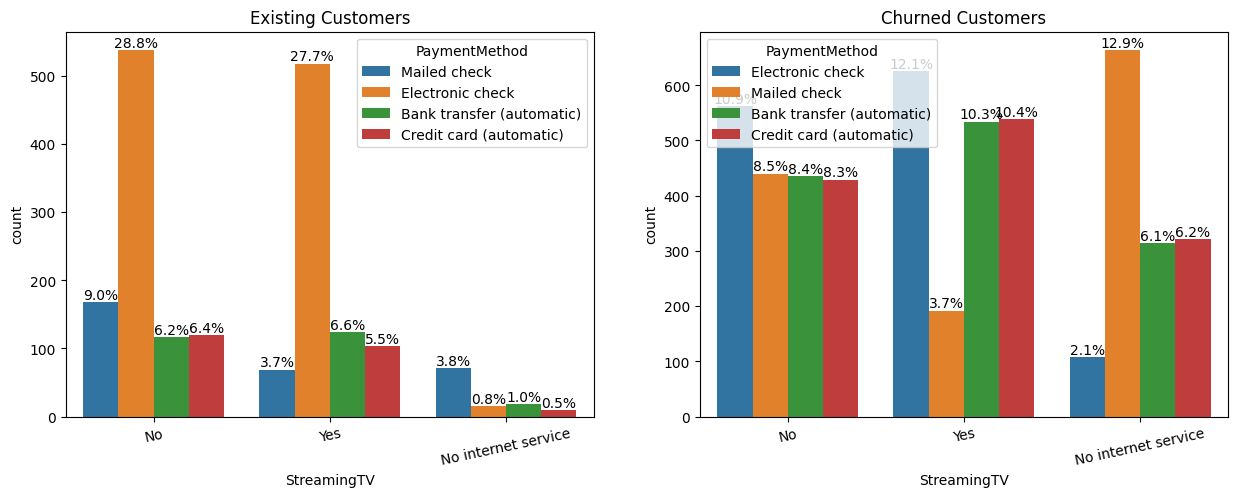

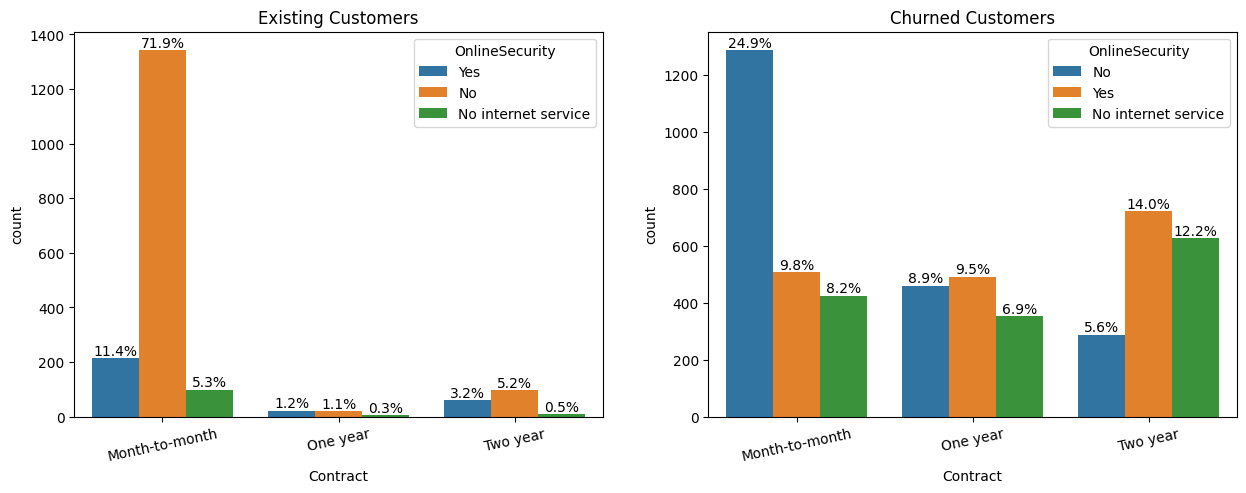

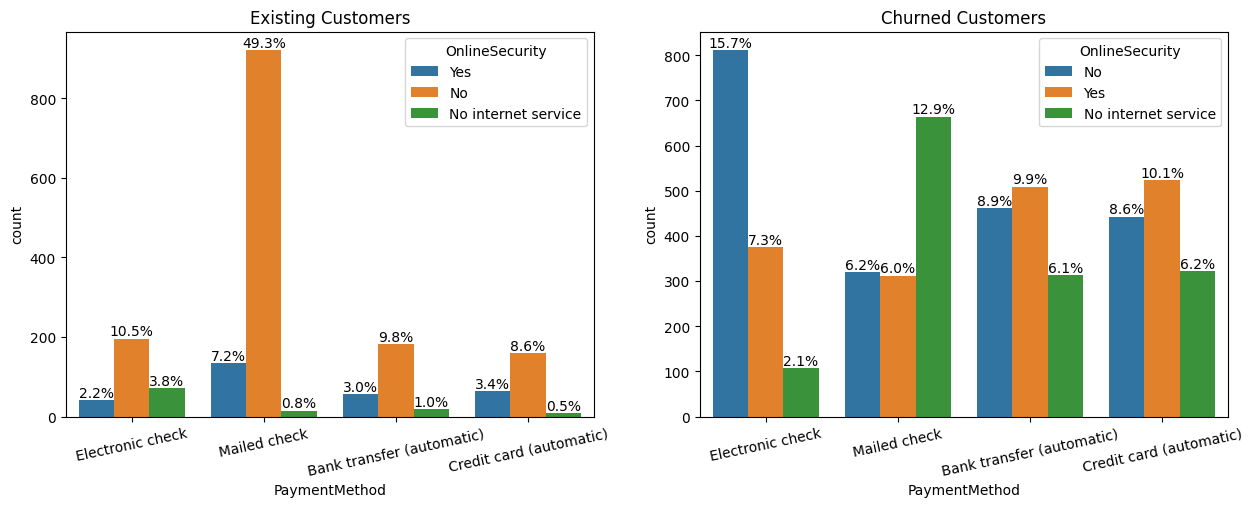

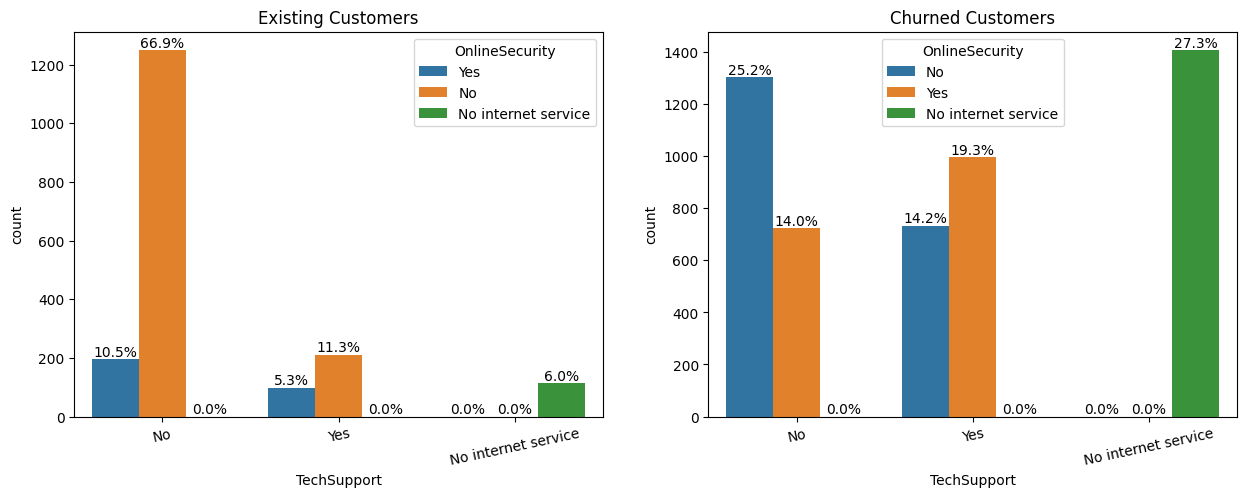

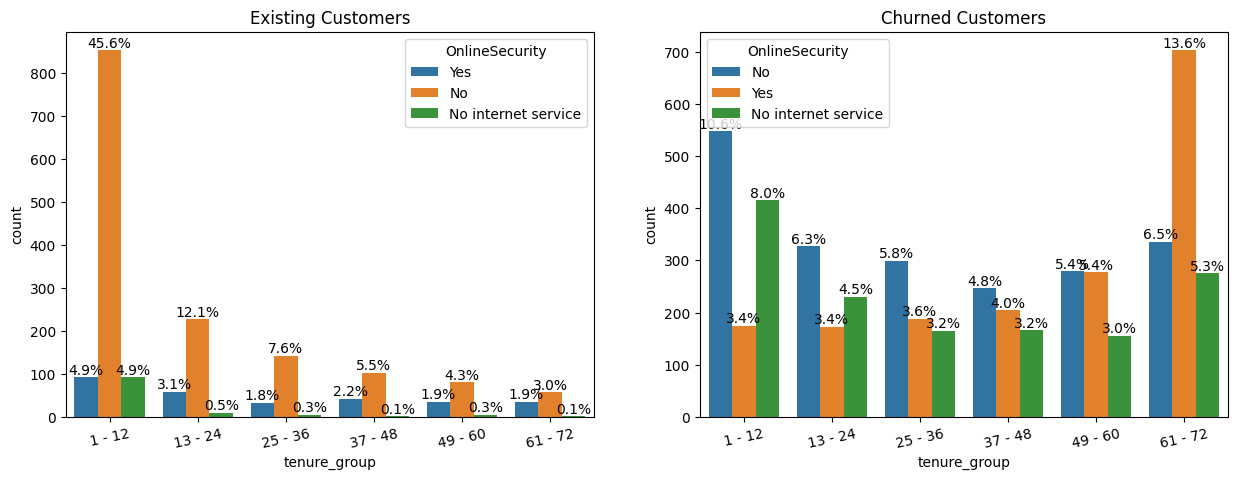

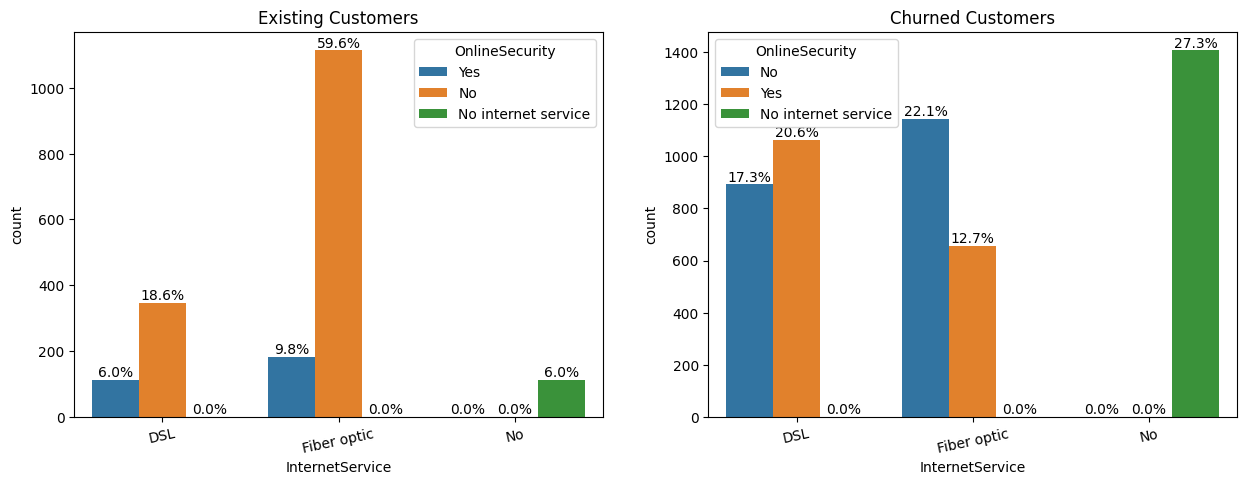

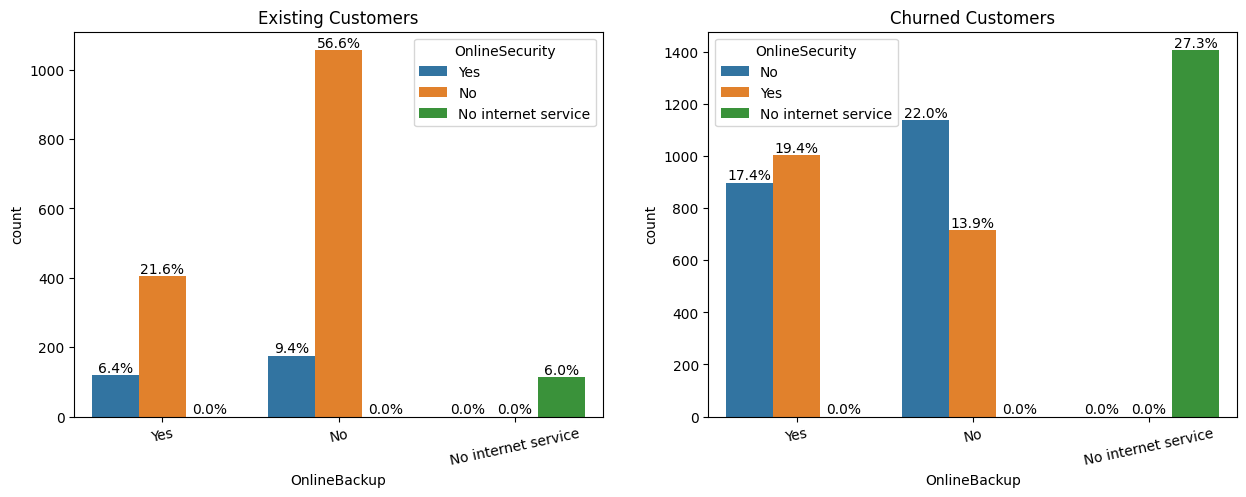

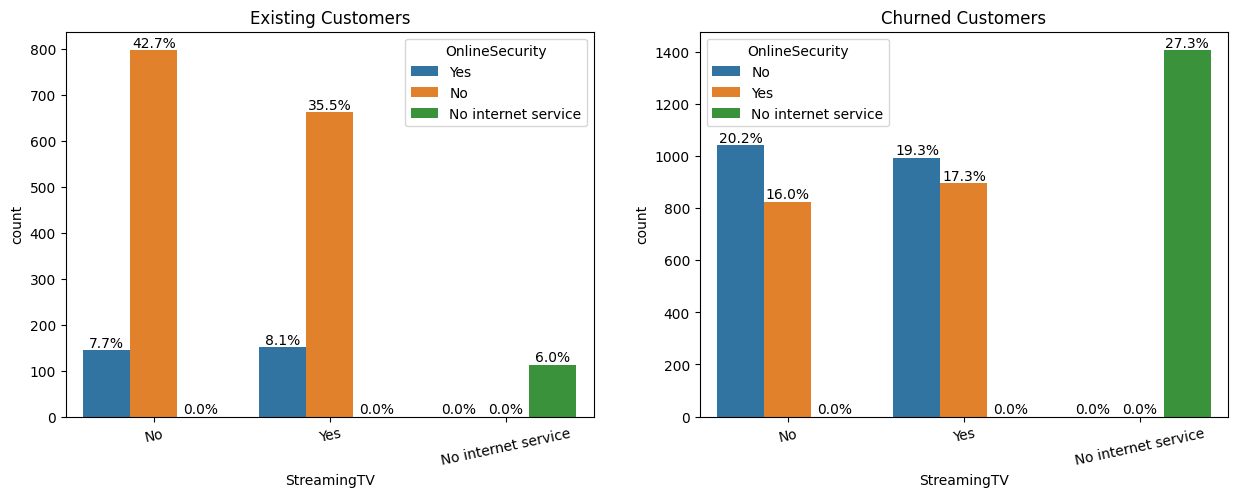

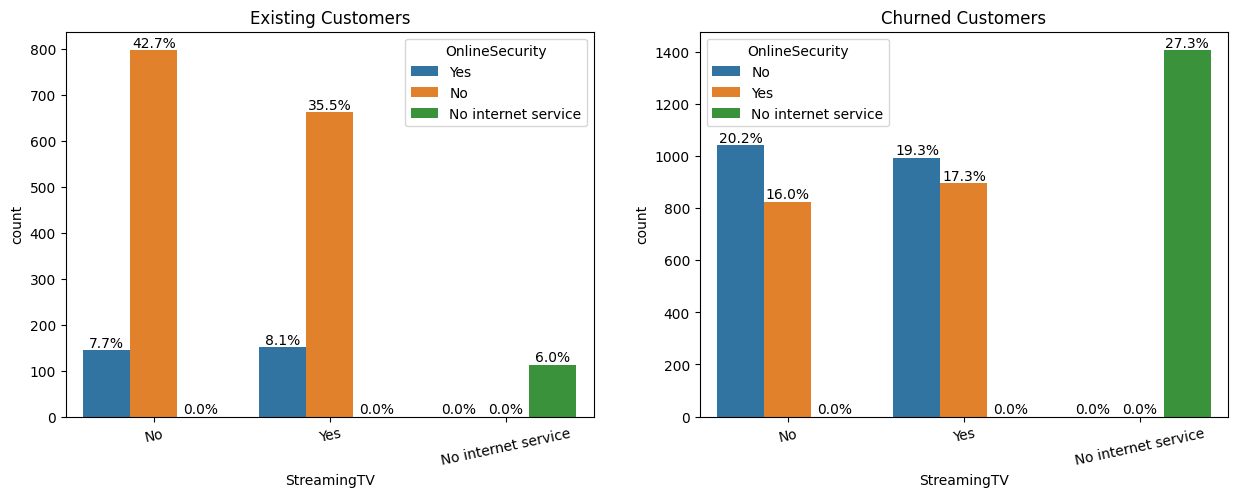

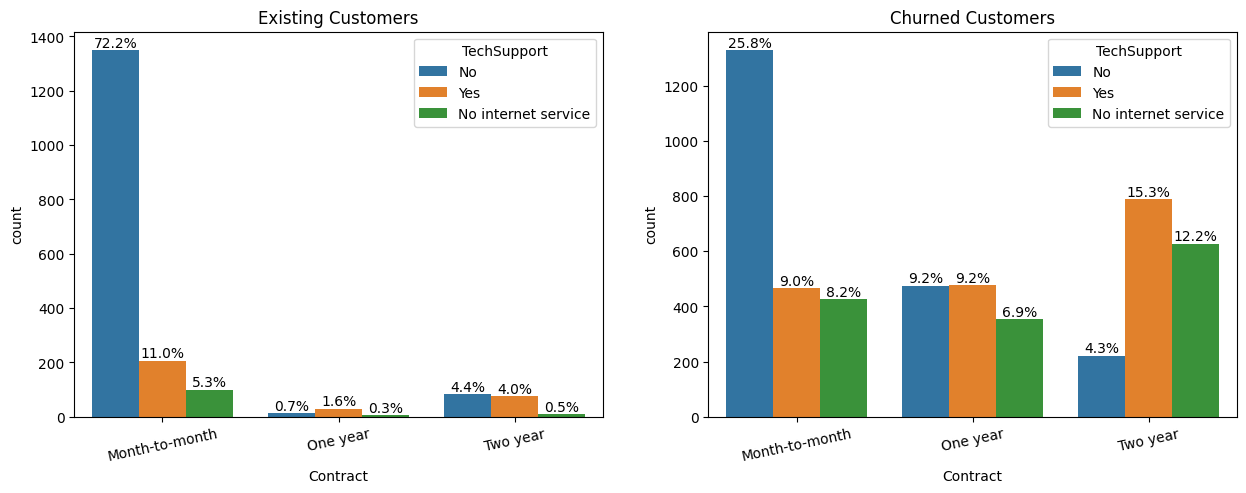

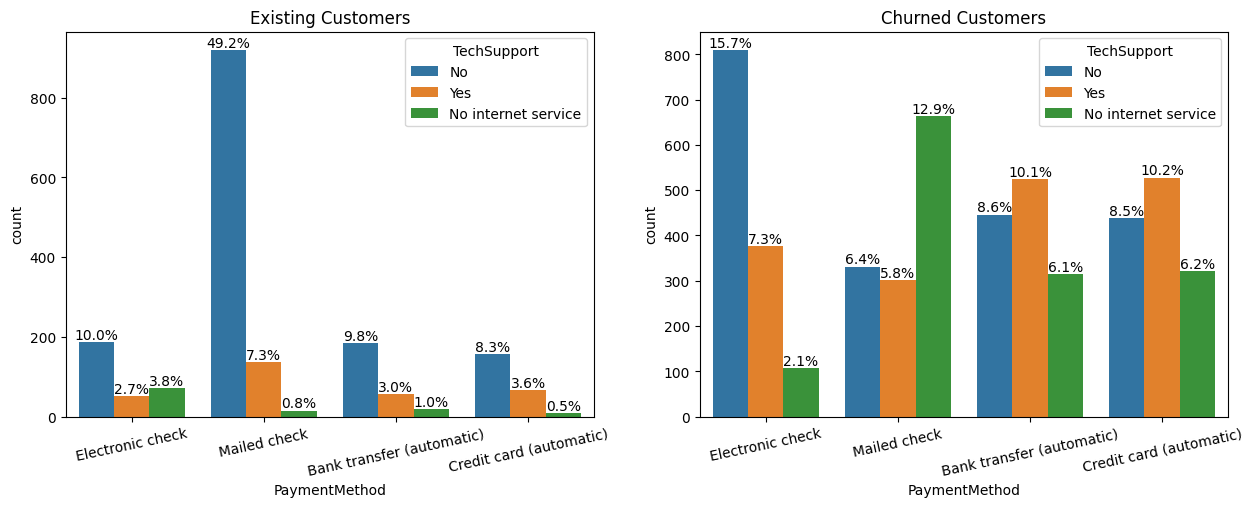

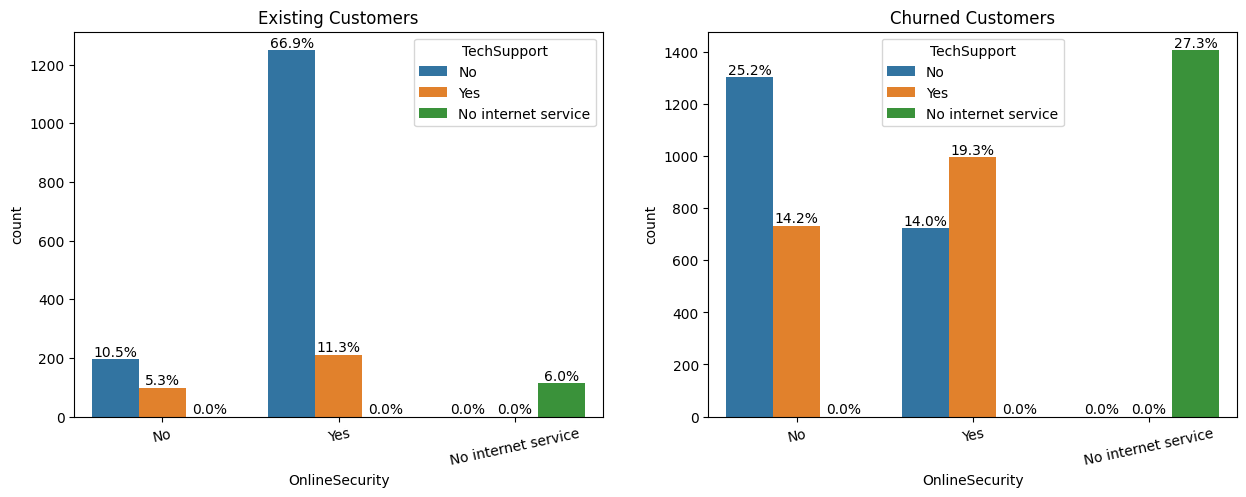

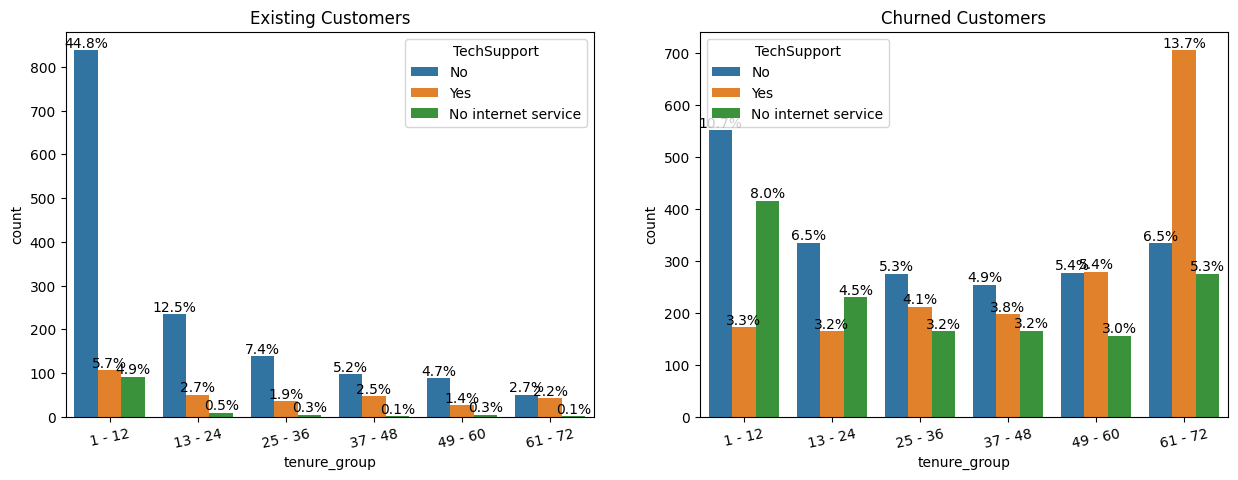

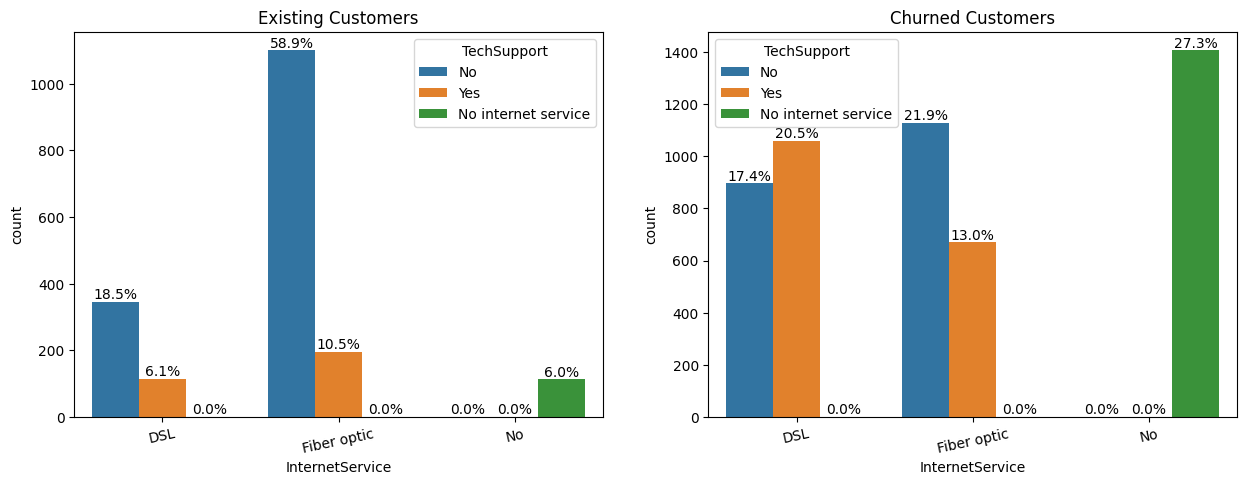

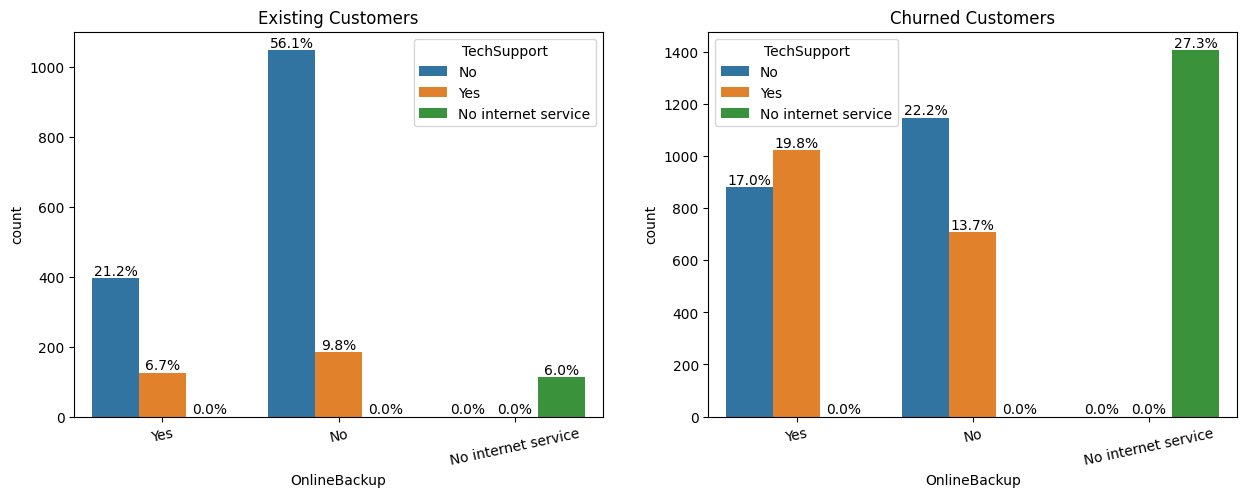

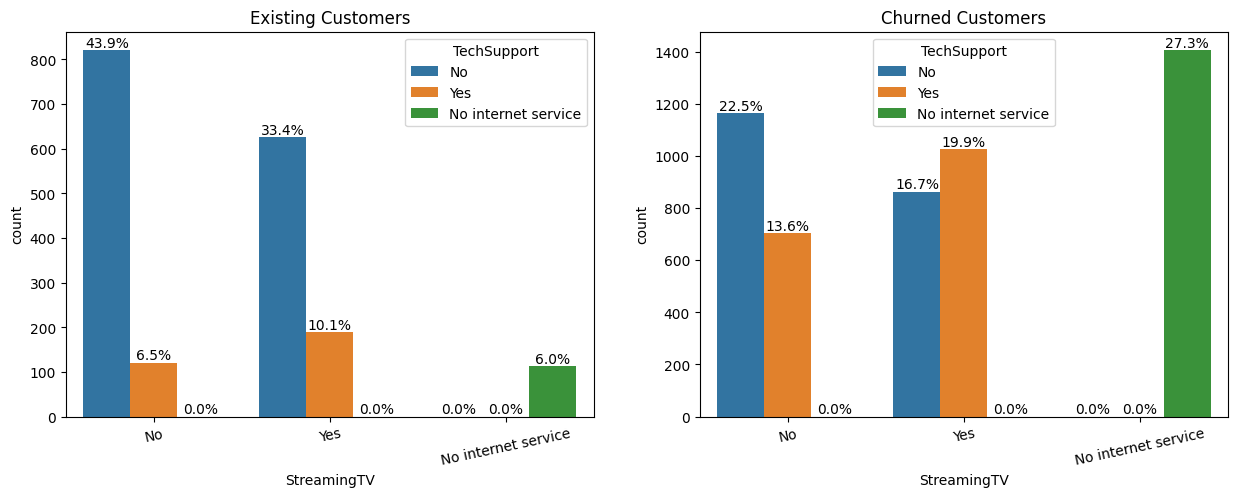

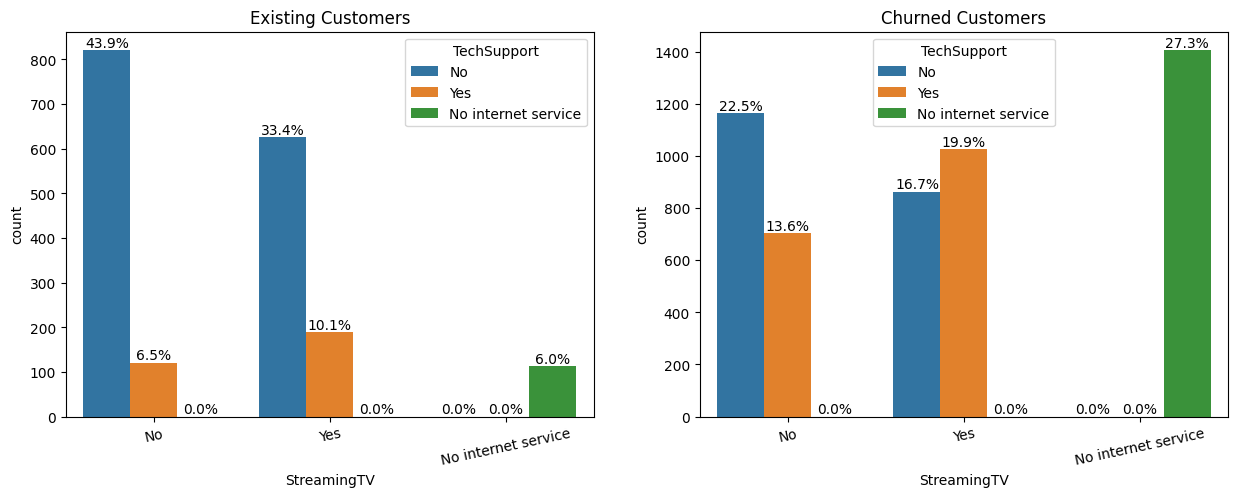

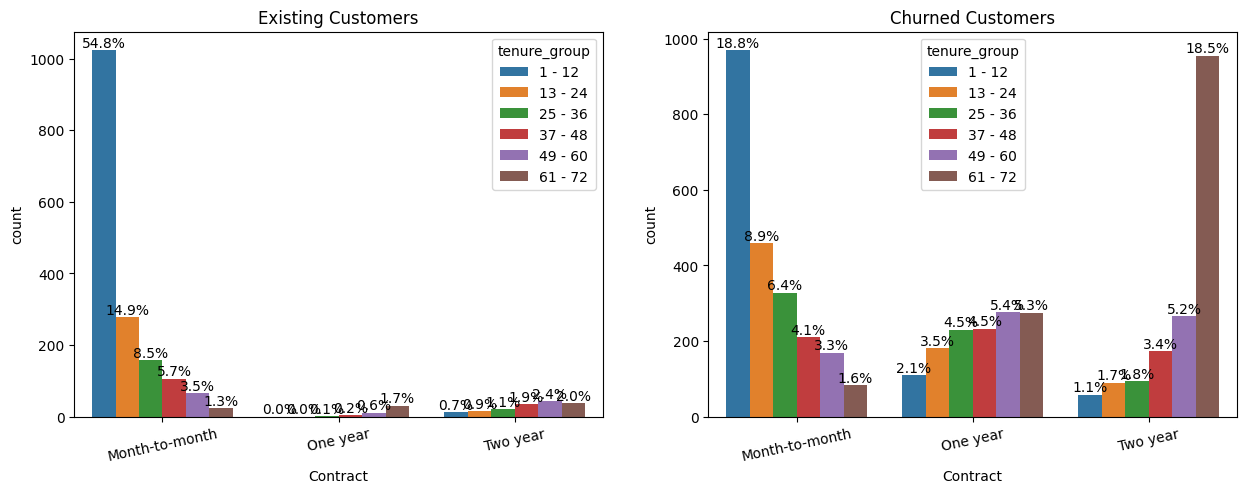

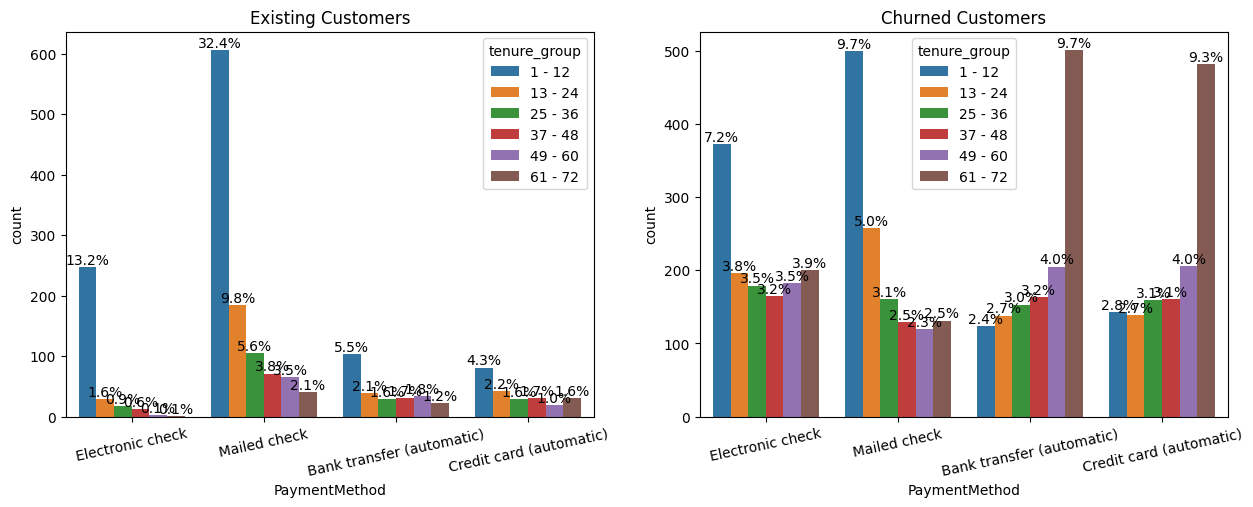

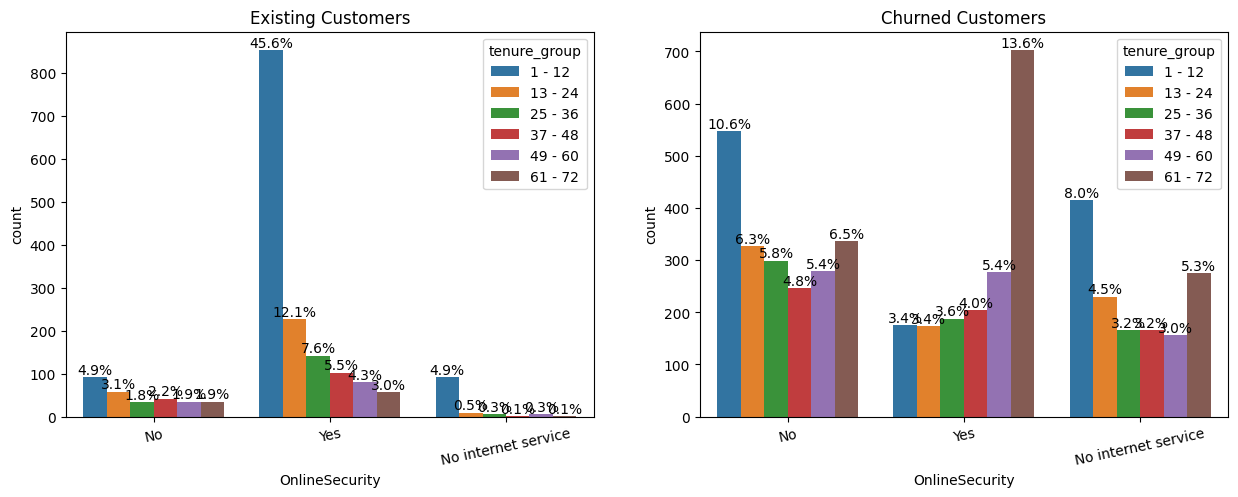

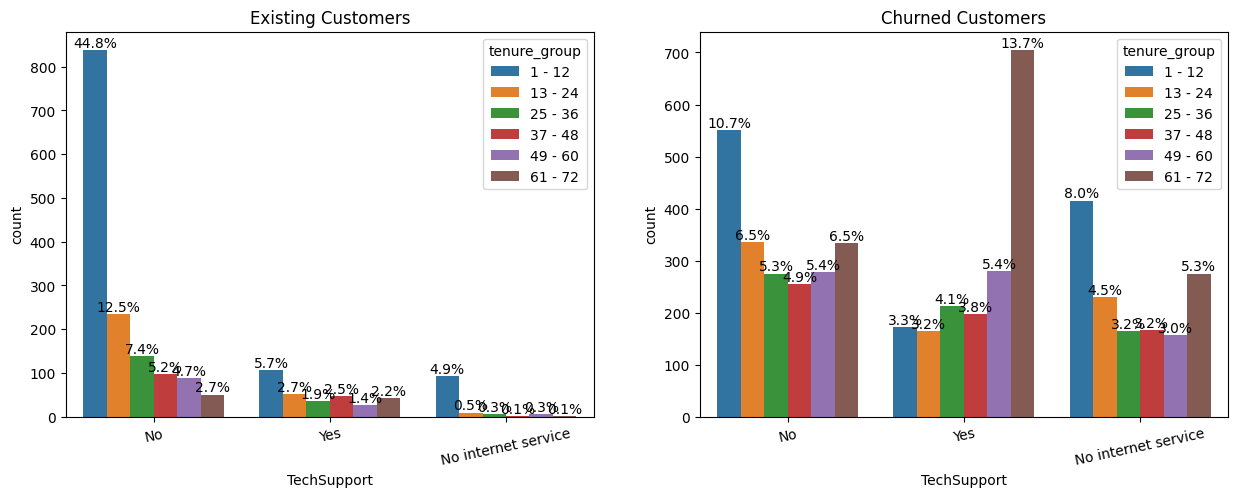

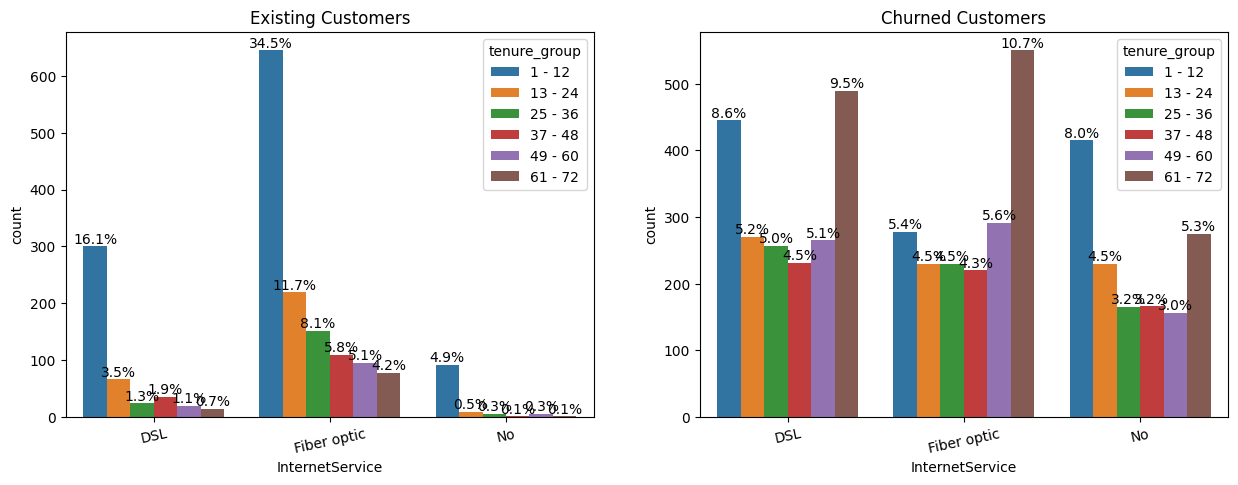

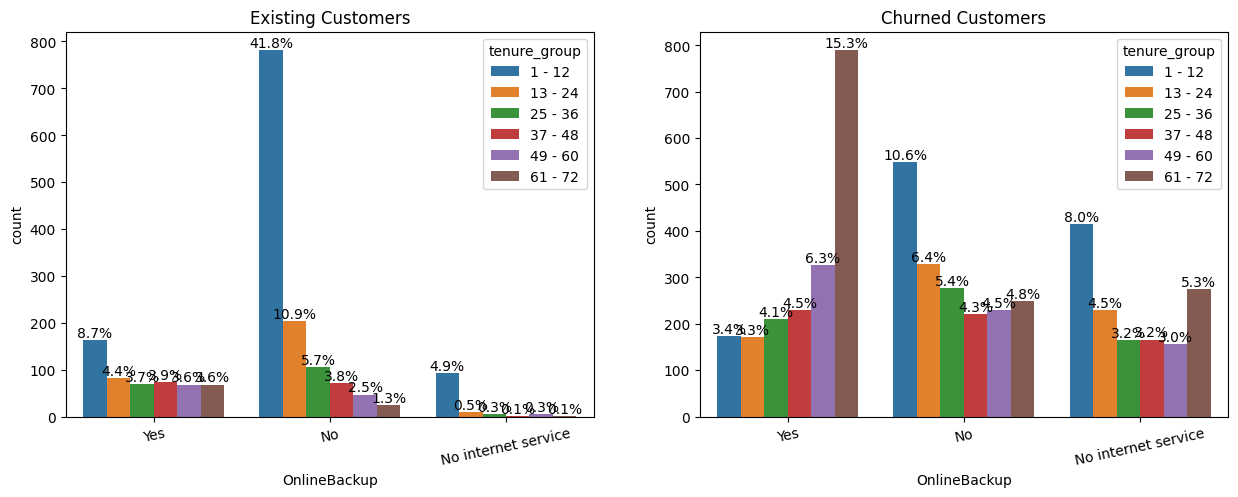

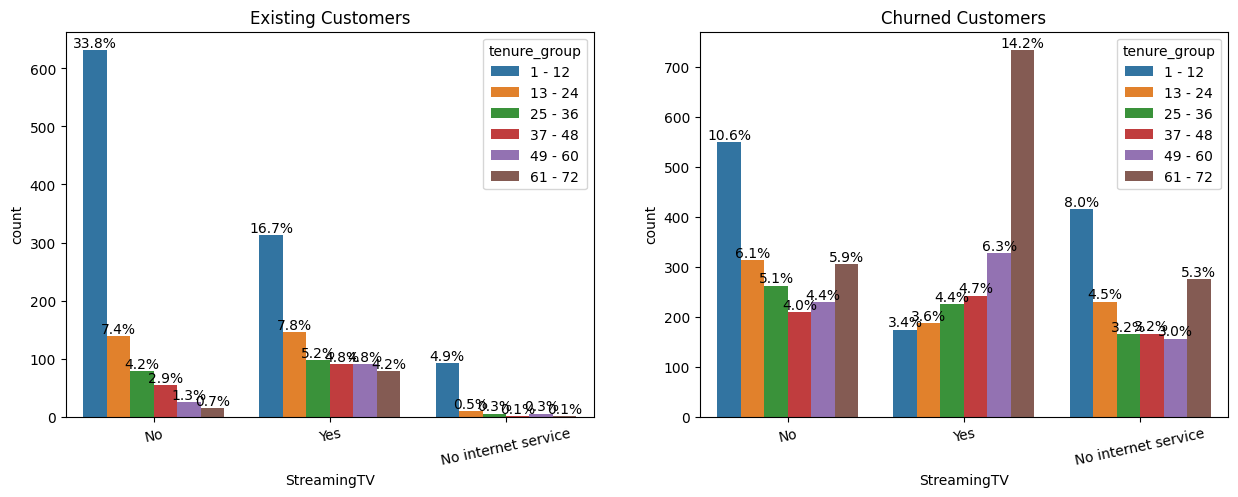

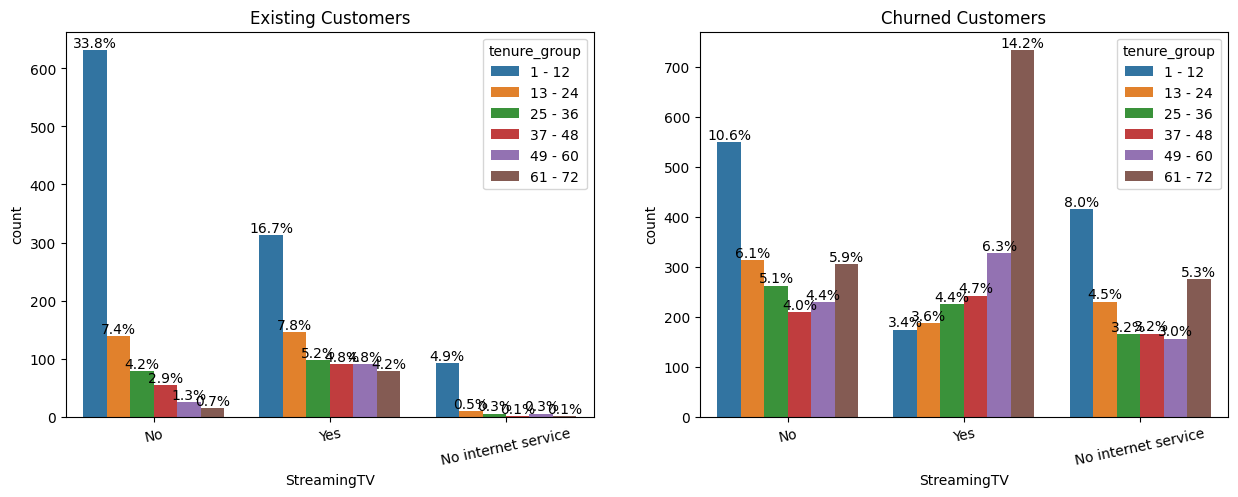

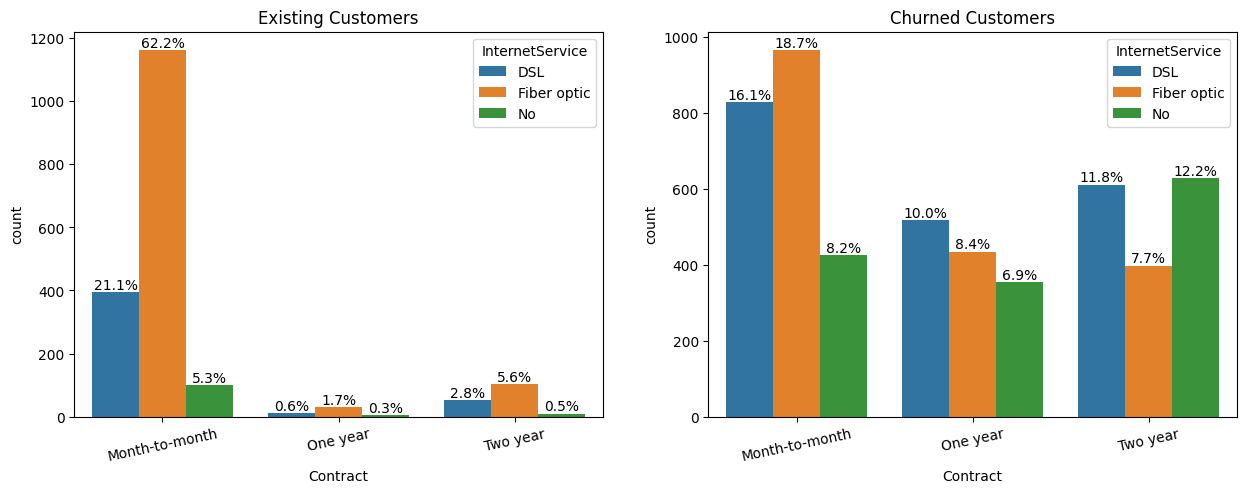

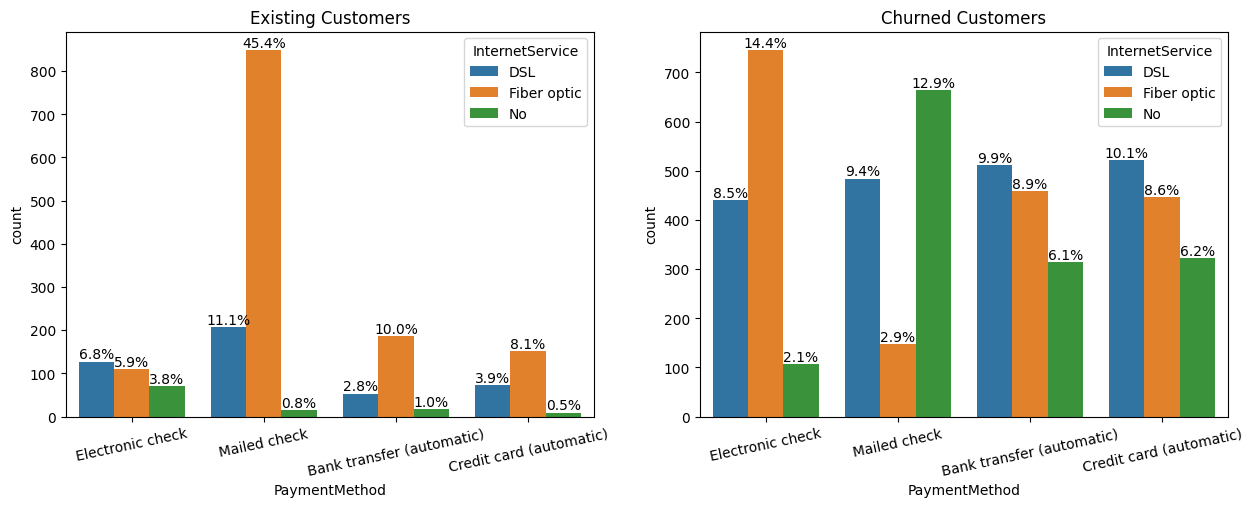

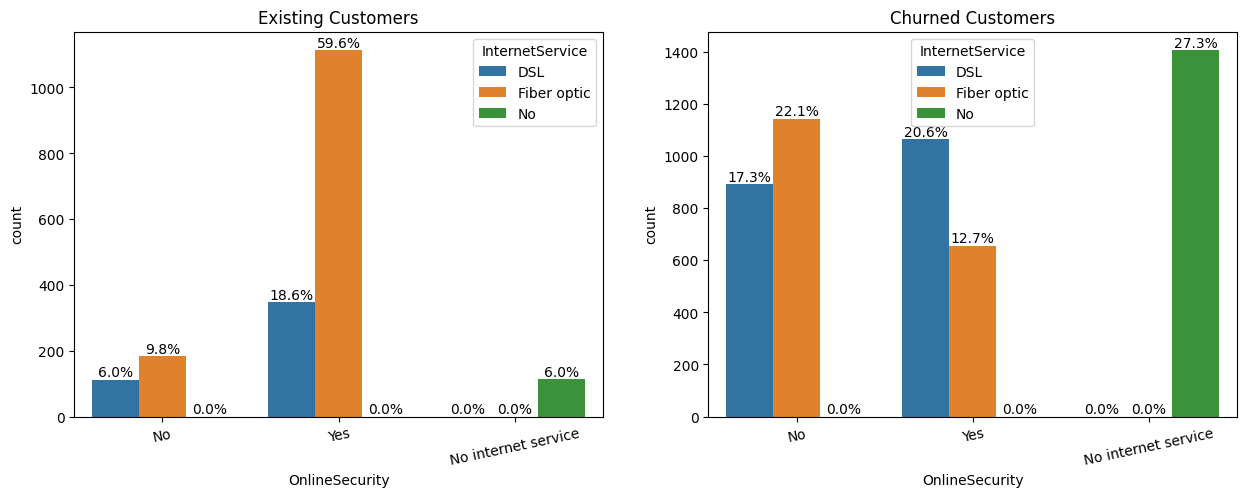

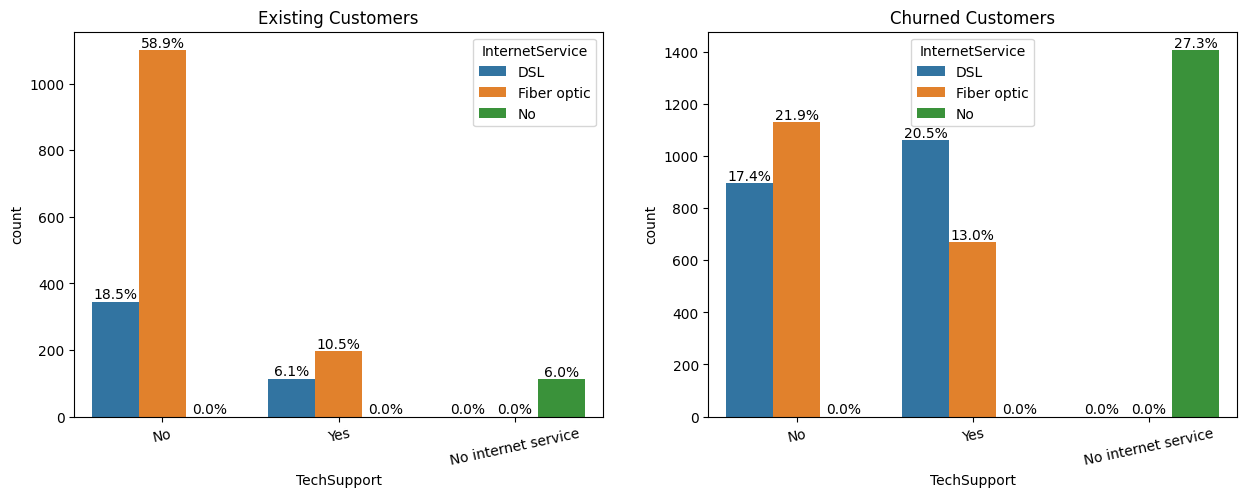

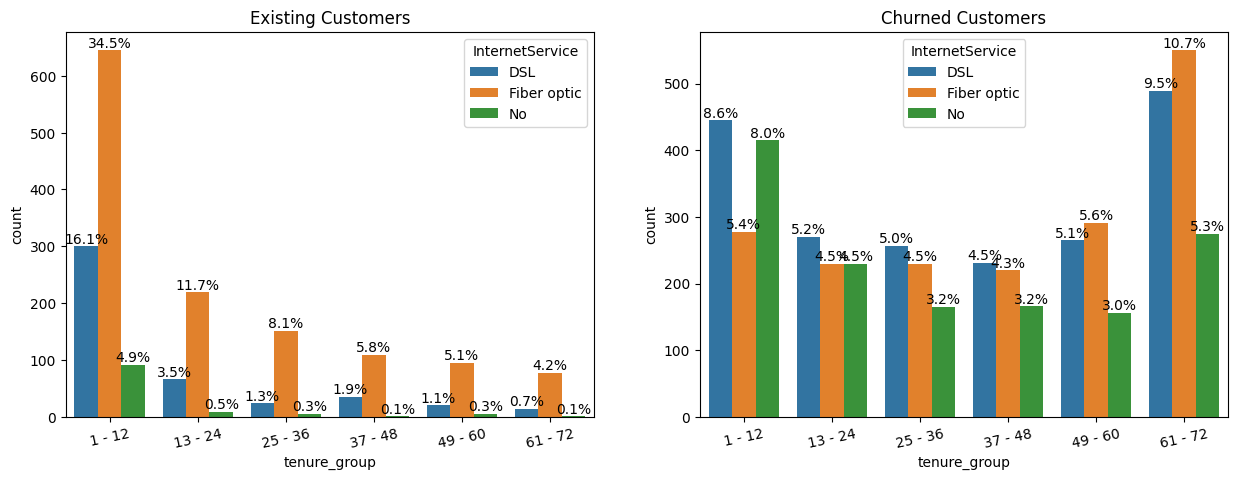

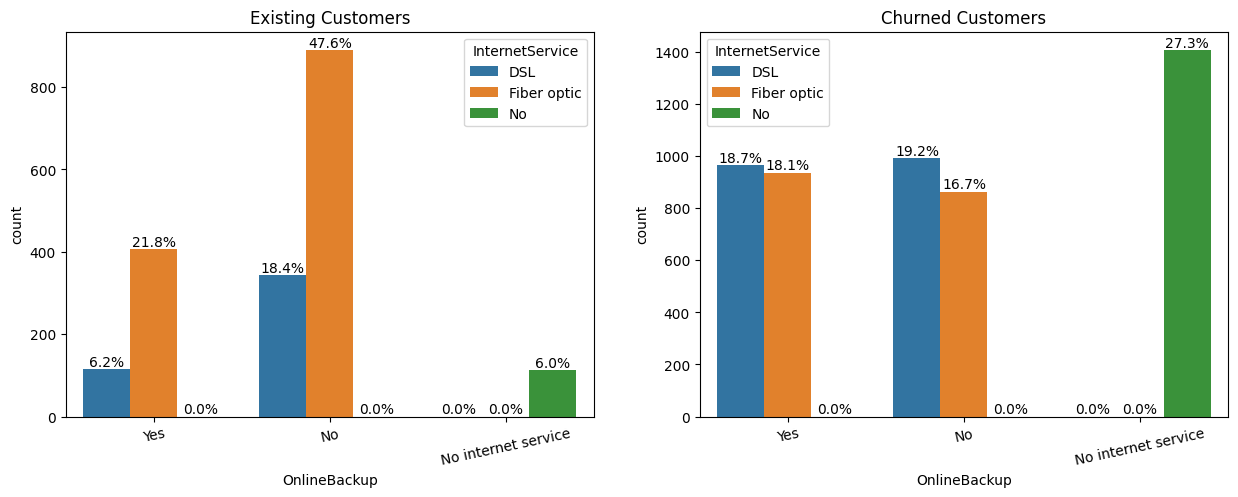

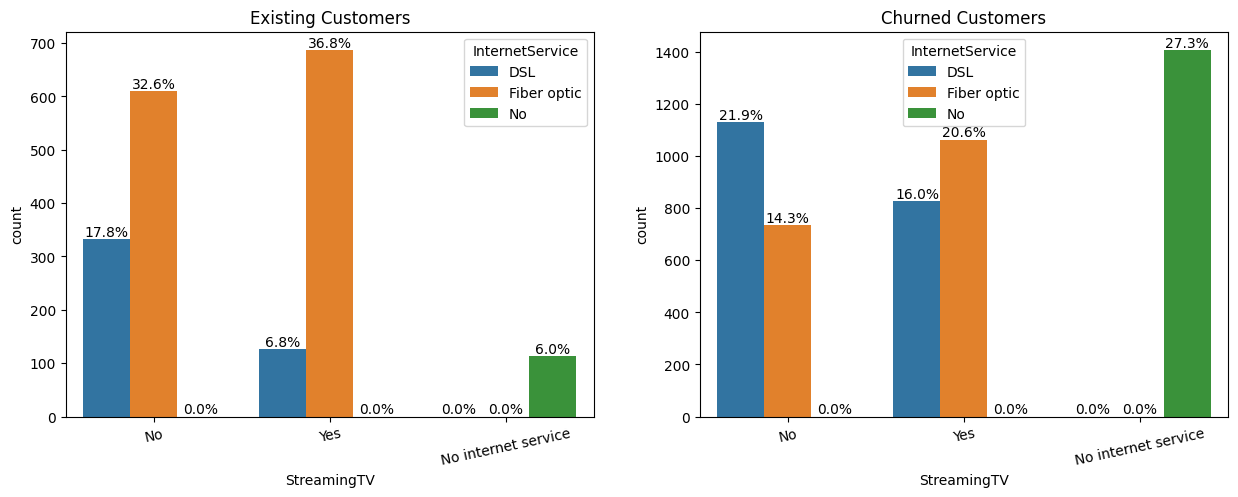

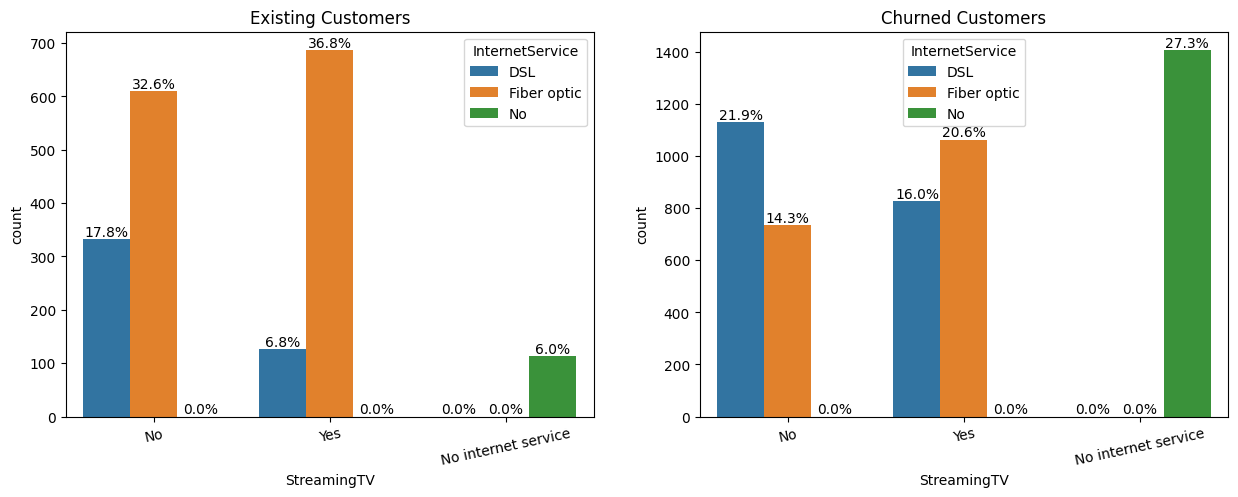

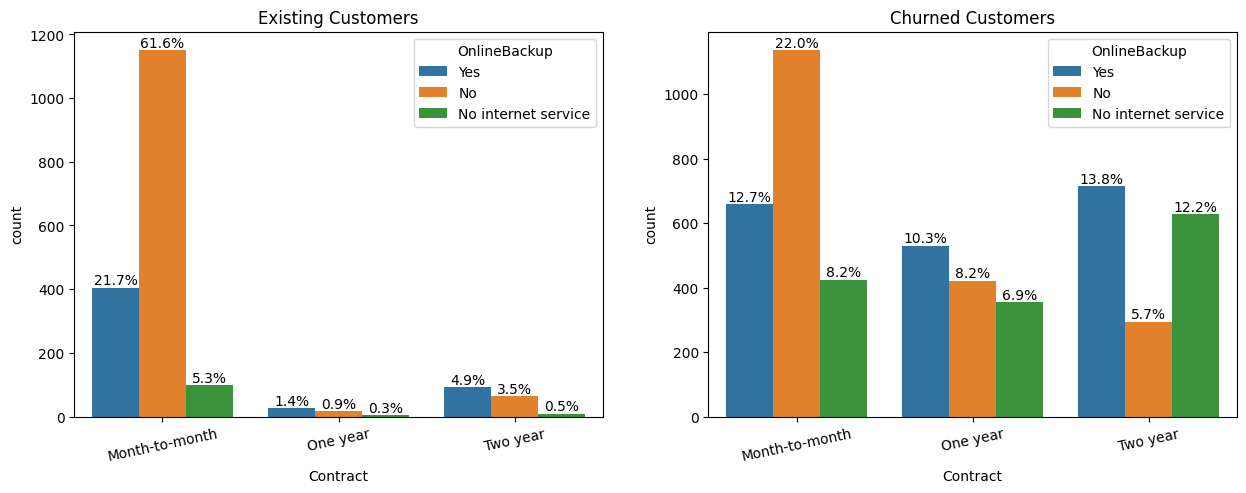

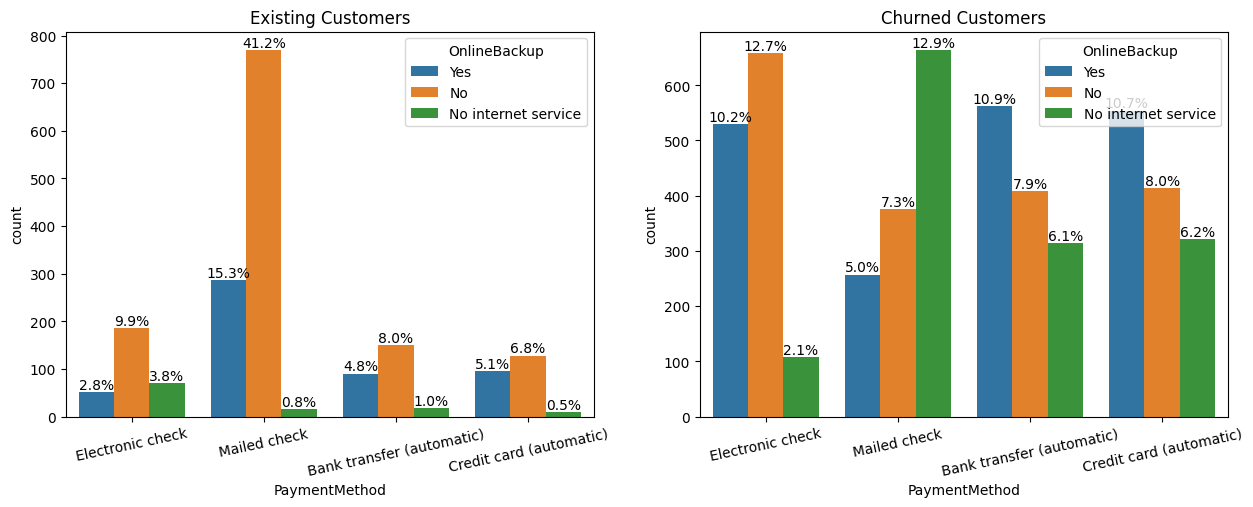

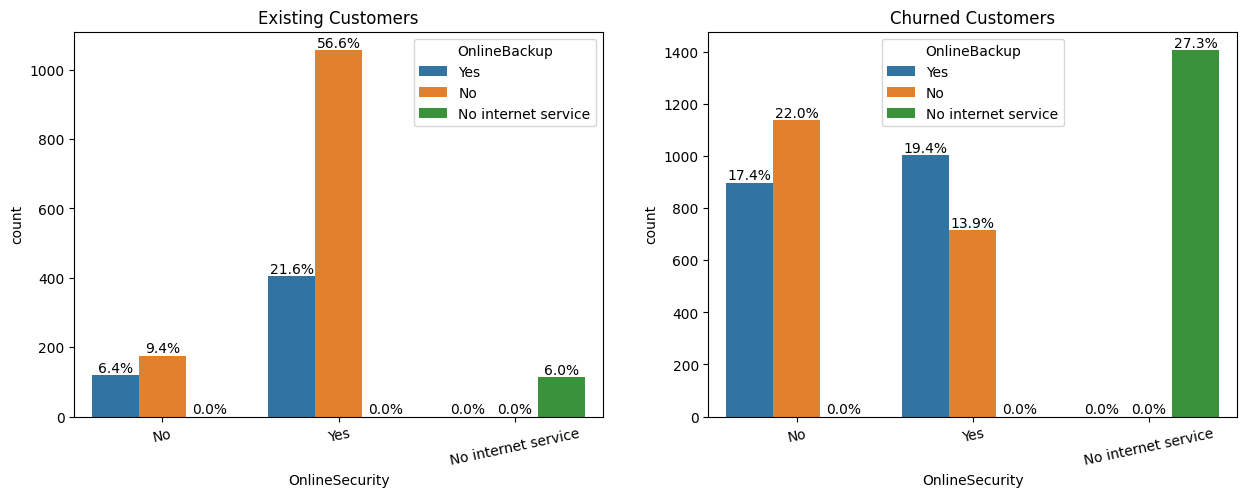

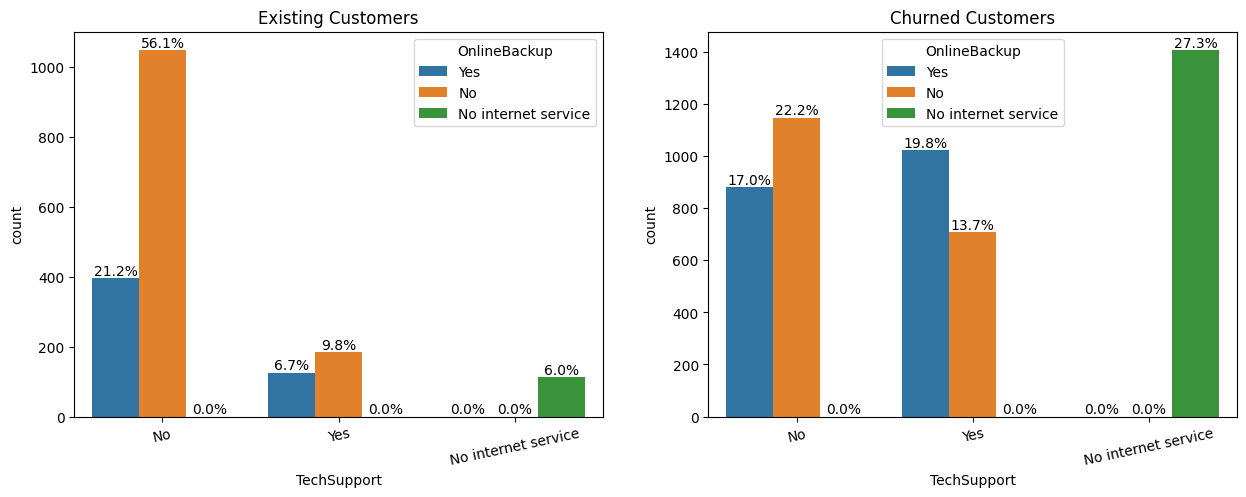

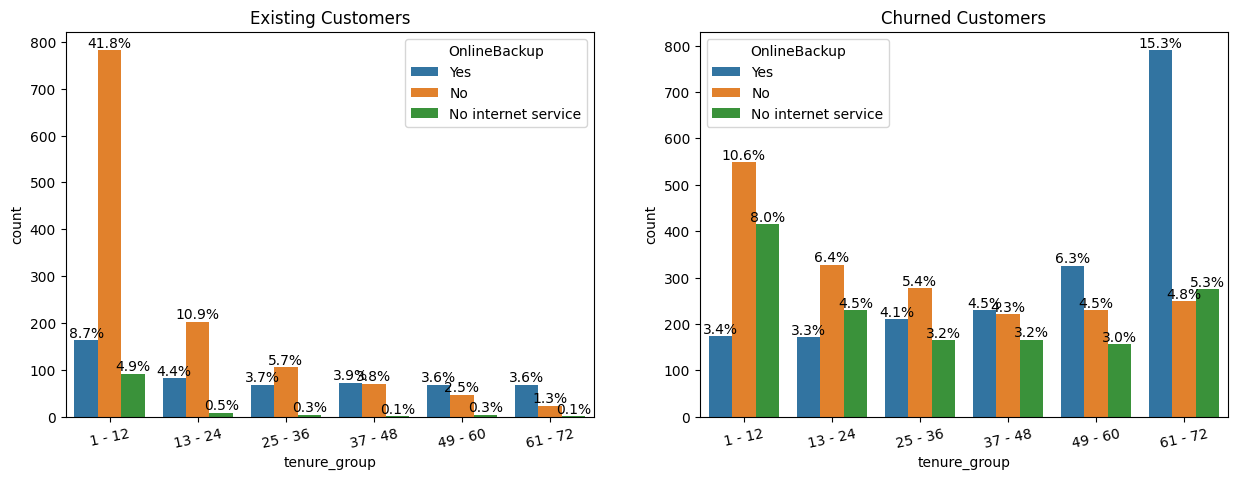

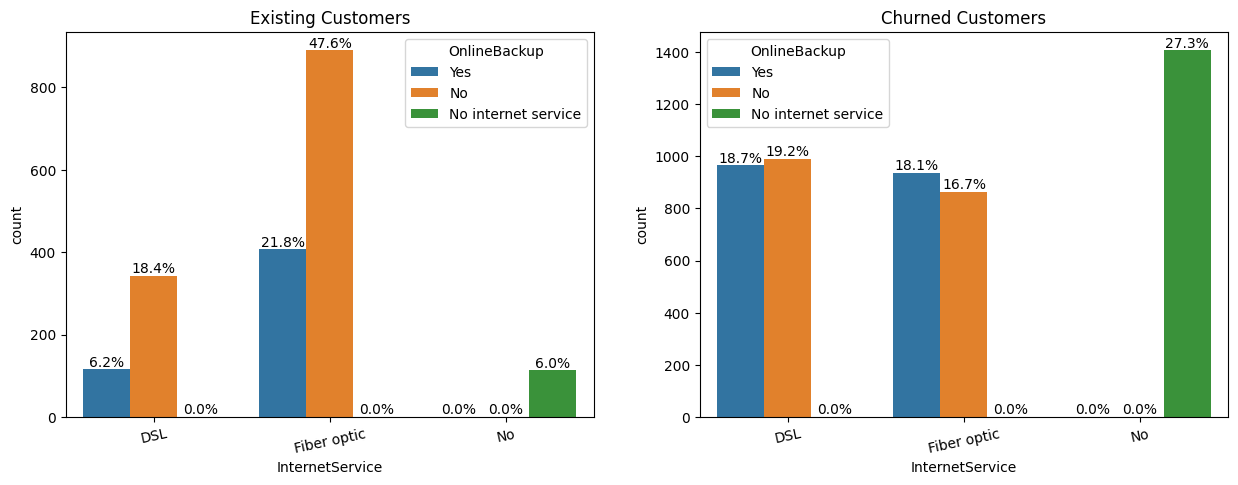

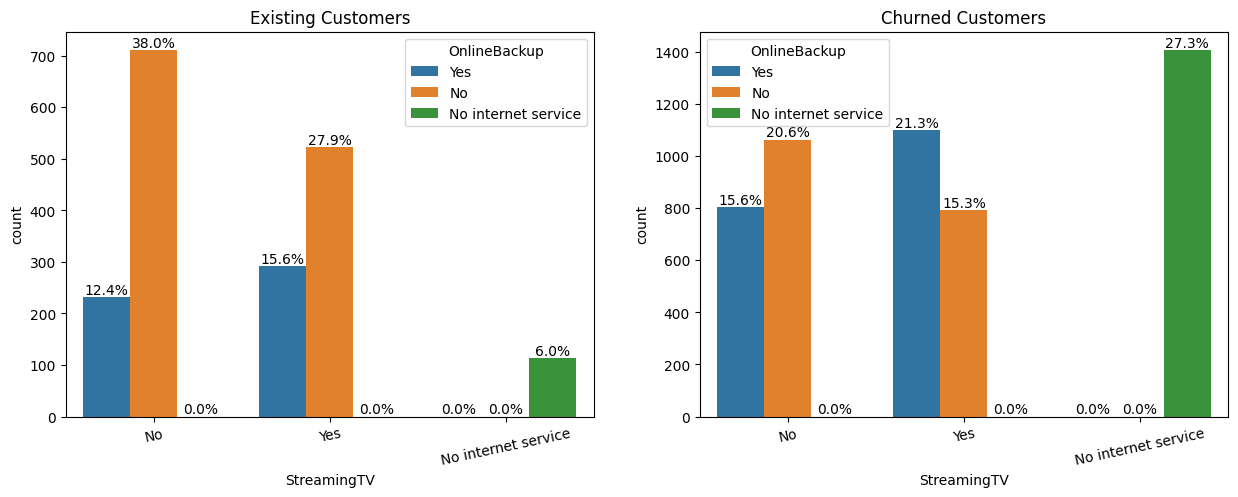

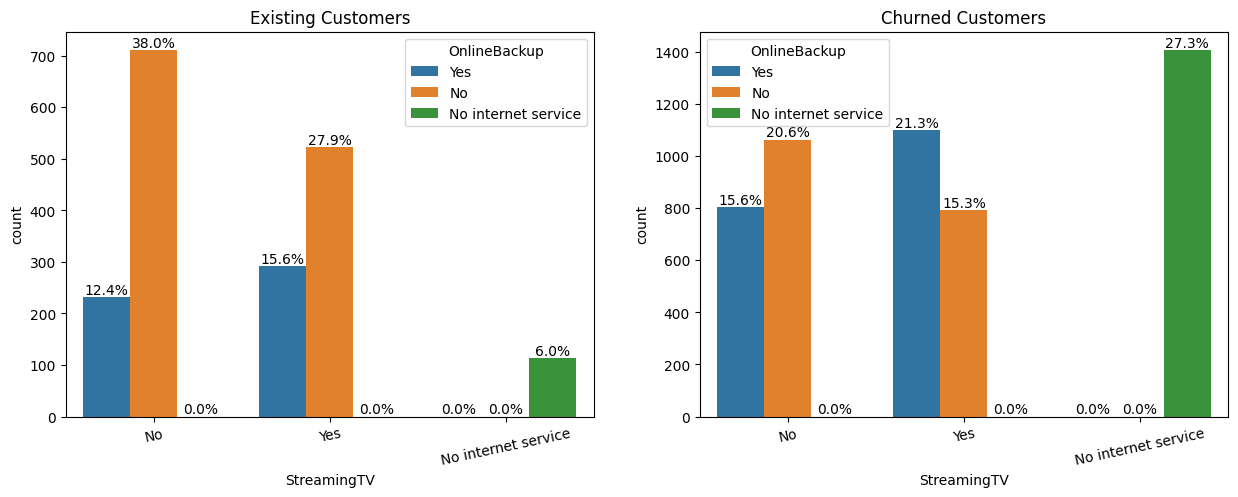

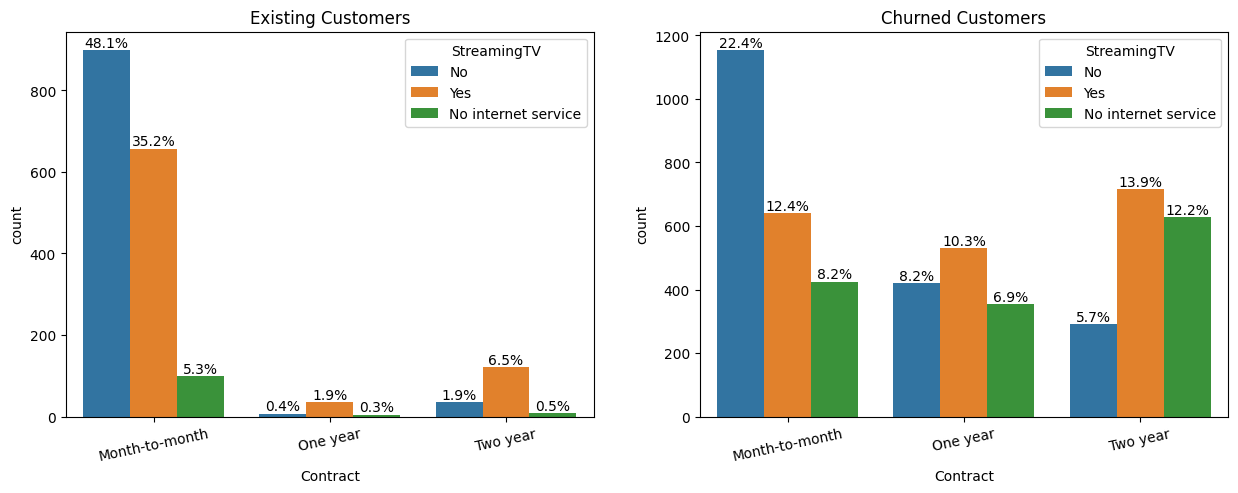

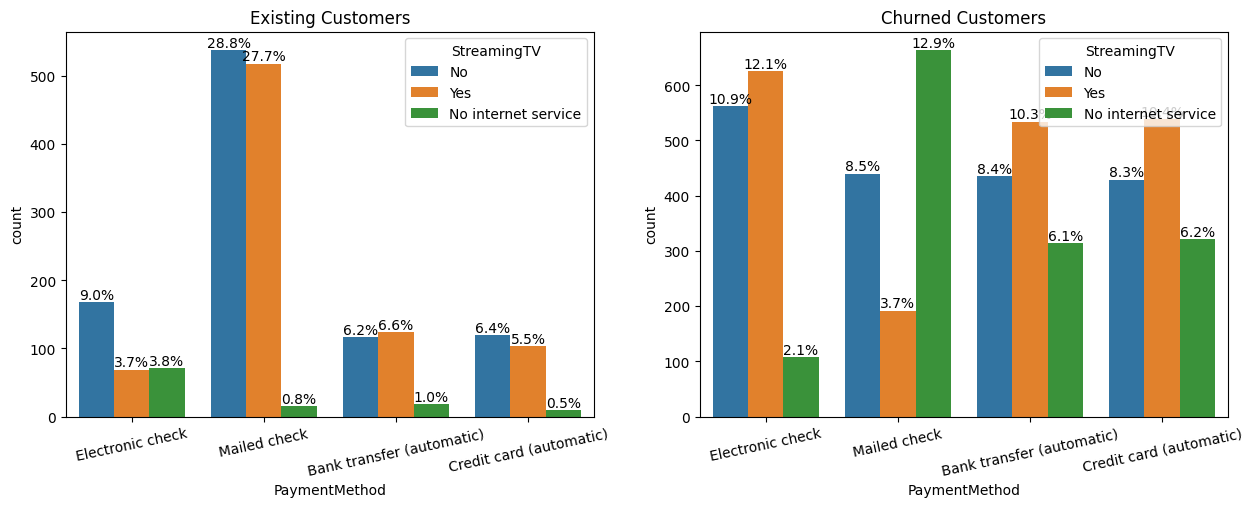

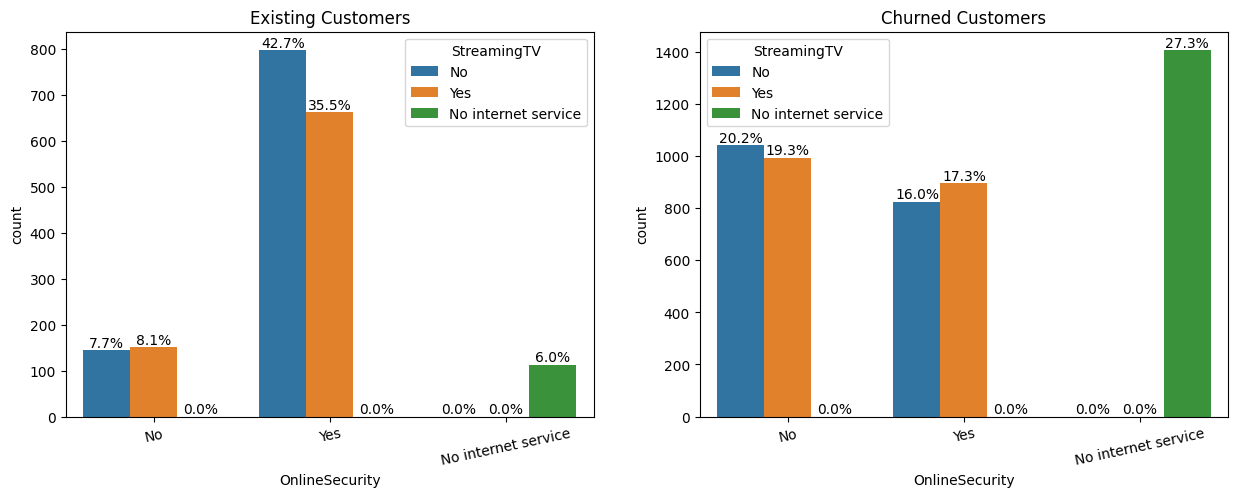

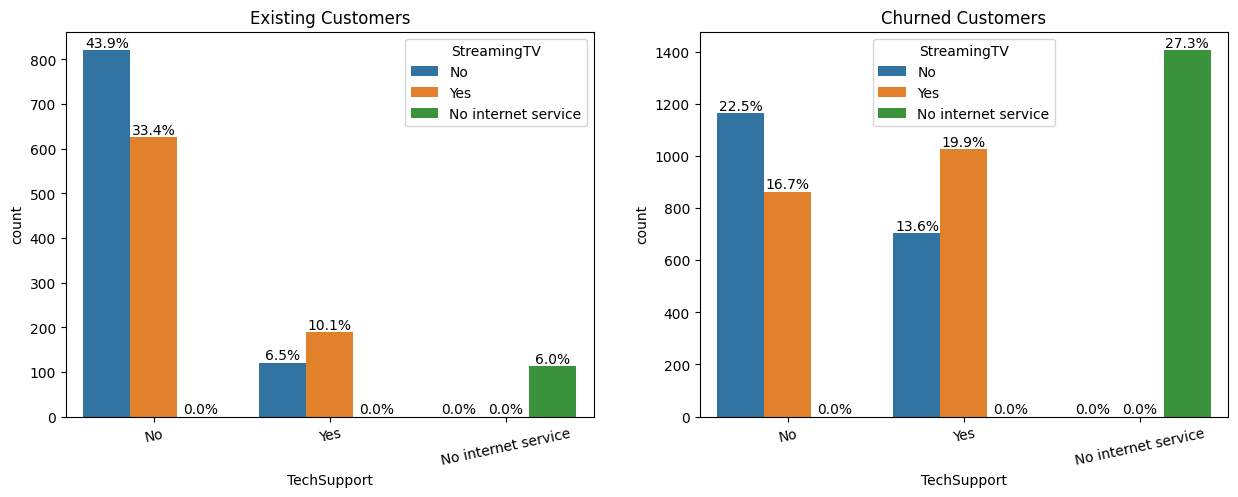

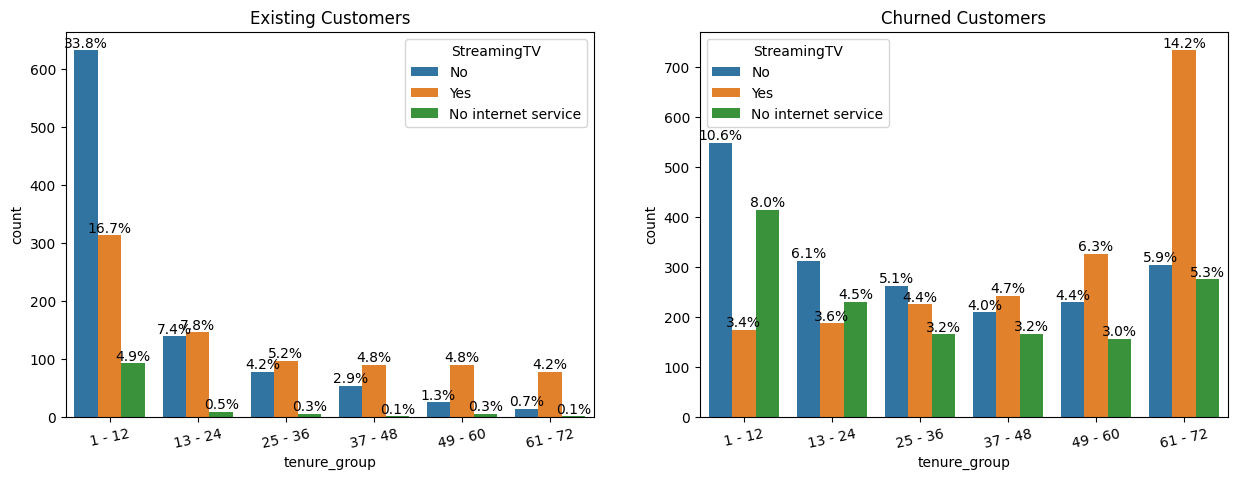

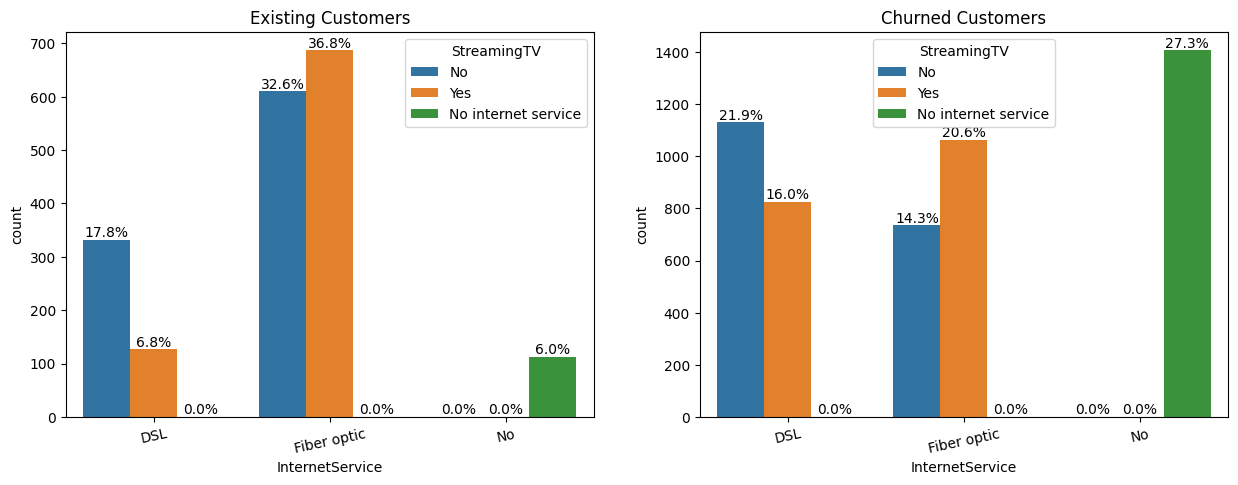

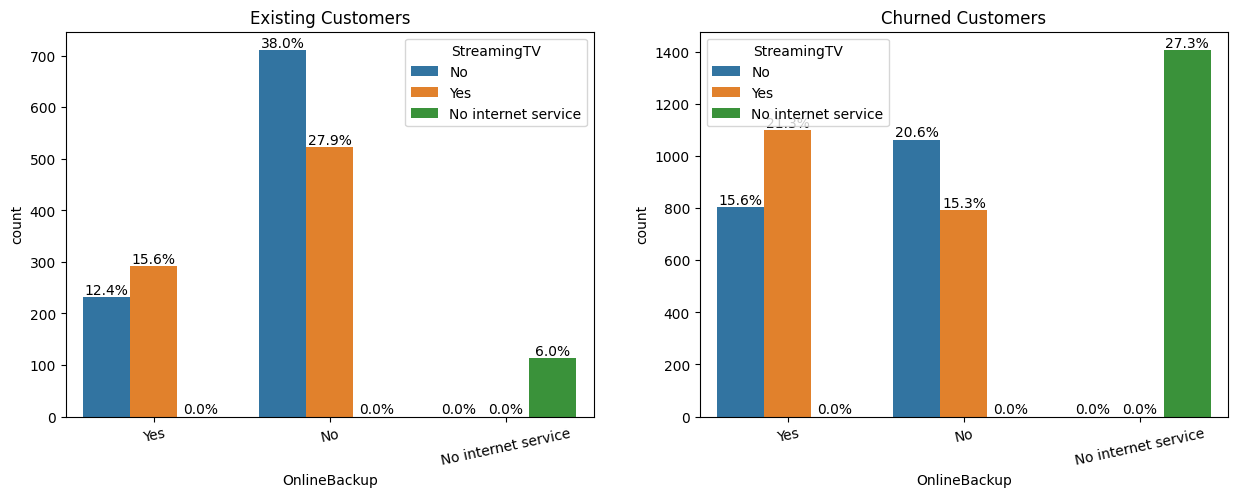

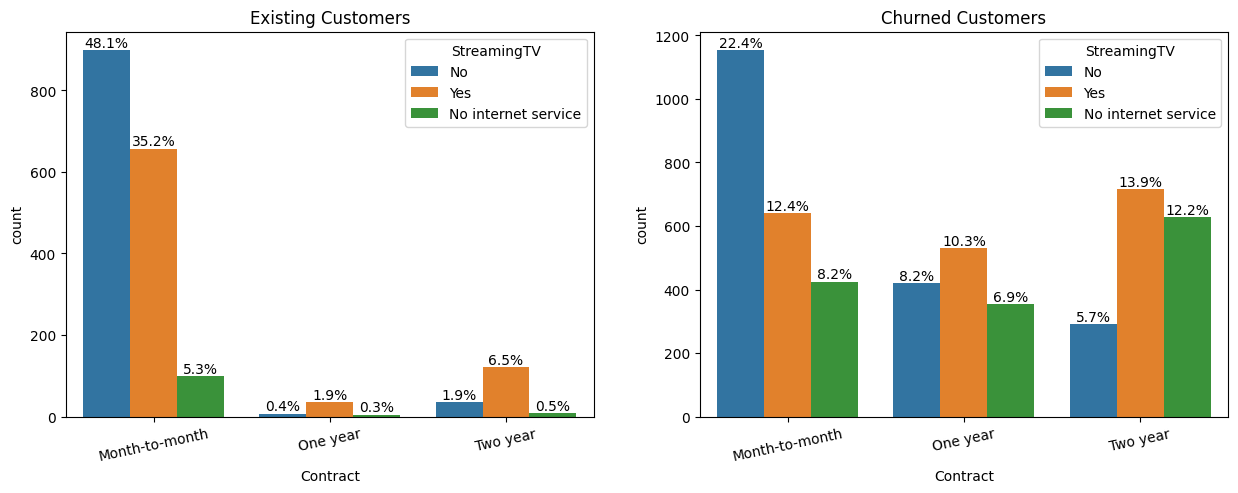

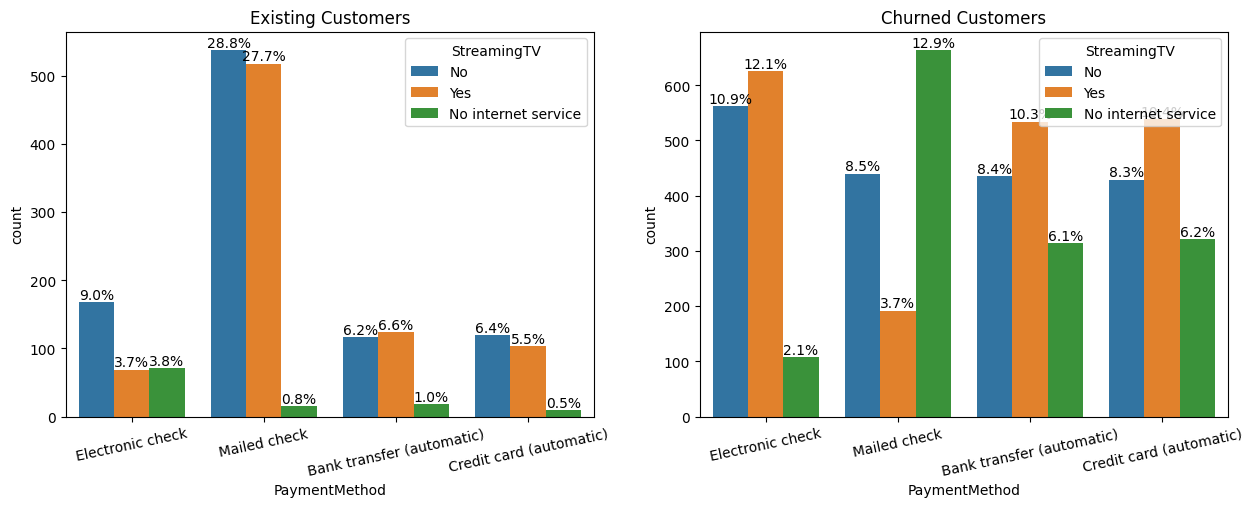

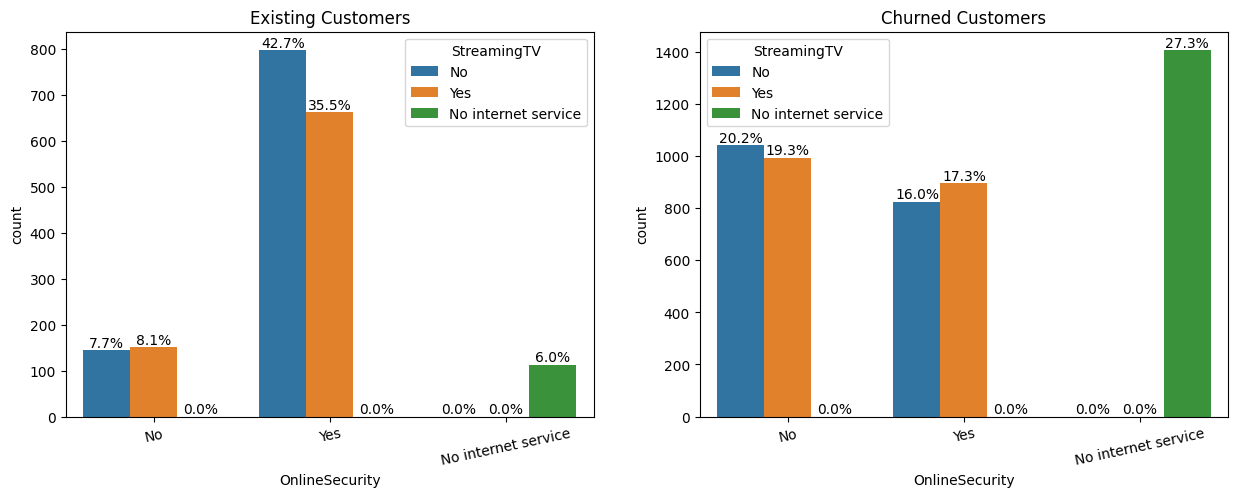

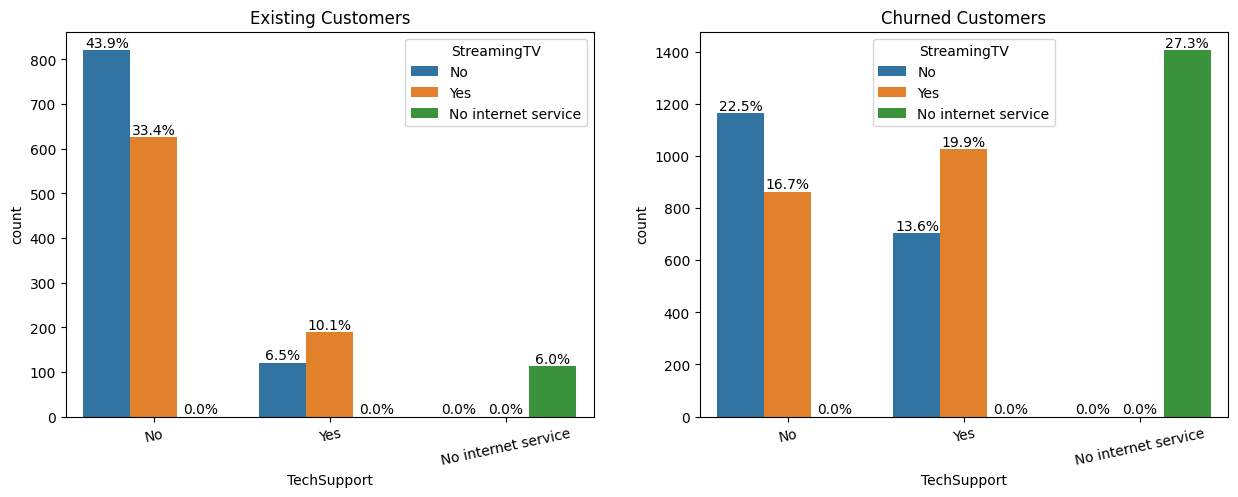

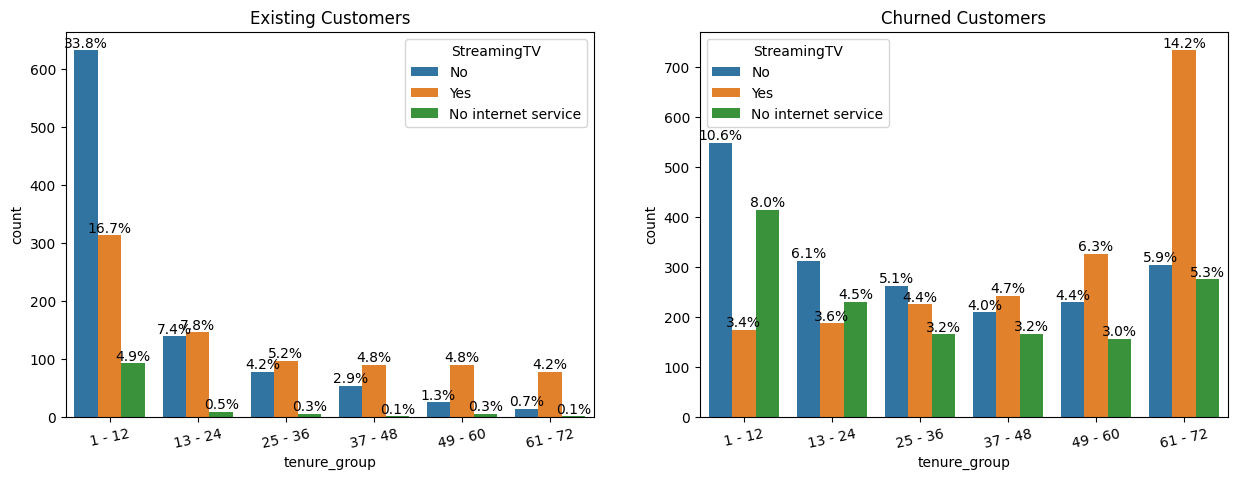

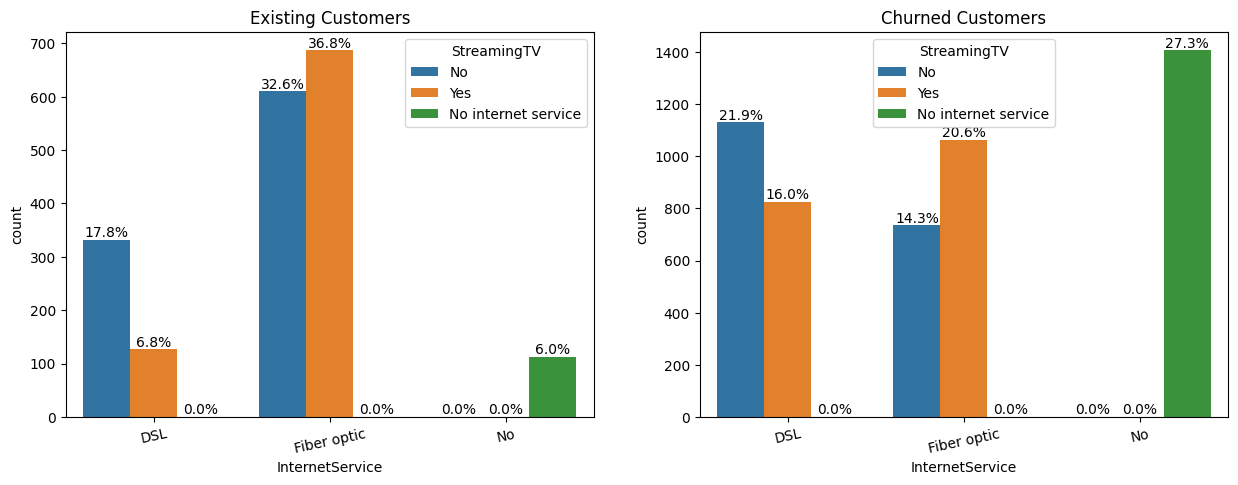

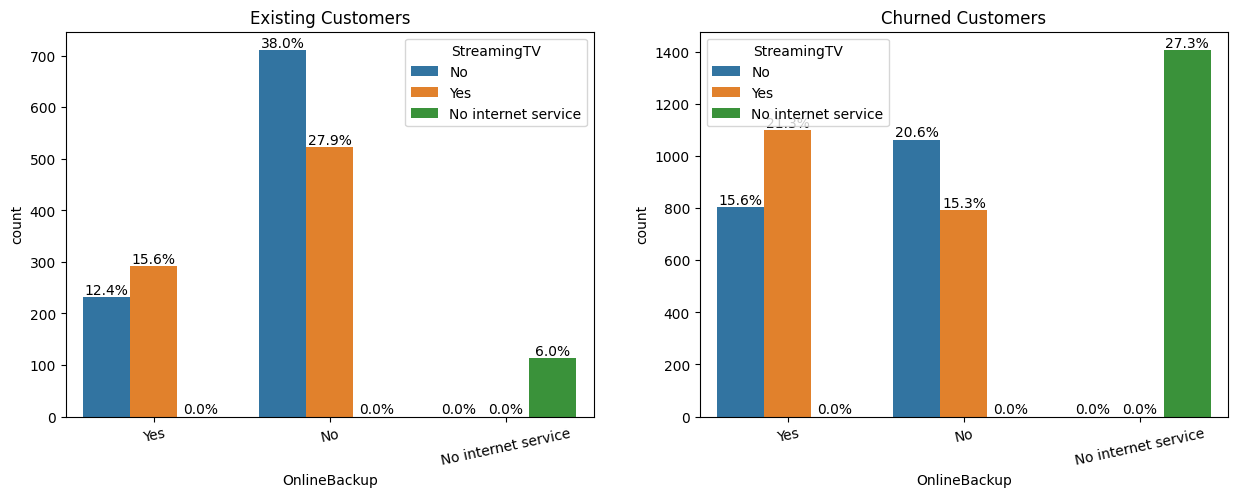

In [48]:

hue = ['Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'tenure_group', 'InternetService','OnlineBackup', 'StreamingTV', 'StreamingTV']
for j in hue :
    for i , col in enumerate(hue) :
        if j != col:
            fig, ax = plt.subplots(1,2,sharex=True,figsize=(15,5))
            # plt.figure(i, figsize=(6,4))
            # plt.xticks(rotation = 15)
            ax1 = sns.countplot(ax = ax[0] , data = non_churned_data, x=col, hue= j)
            ax2 = sns.countplot(ax = ax[1], data = churned_data, x=col , hue=j)
            
            
            # ax1.legend(["No Churn","Churn"])
            ax2.title.set_text("Churned Customers")
            ax1.title.set_text("Existing Customers")
            ax2.tick_params('x', labelrotation=12)
            ax1.tick_params('x', labelrotation=12)

            # add annotations
            for c in ax2.containers:
                labels = [f'{v.get_height()/churned_data.Churn.count()*100:0.1f}%' for v in c]
                ax2.bar_label(c, labels=labels, label_type='edge')

            for c in ax1.containers:
                labels = [f'{v.get_height()/non_churned_data.Churn.count()*100:0.1f}%' for v in c]
                ax1.bar_label(c, labels=labels, label_type='edge')


            plt.show()

## Insights :

1. Monthly contract with no online security,online backup ,tech support, streaming TV in tenure range of 1-12 months , having Fiber optic,DSL internet services are churning more and two yearly contract with online security, in tenure range of 61-72 months are also churning. Also the percentage of monthly contract customers are more so its important attribute for our analysis.
So Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

2. Those customers with no internet service, with no streaming tv, no online backup and no tech support are churning more.

3. Two yearly contract customers in the tenure range of 61-72 and monthly contract in the tenure range of 1-12 months are more likely to churn.

4. Electronic check medium are the highest churners

5. Non senior Citizens are high churners.

6. No Online security, No Tech Support category are high churners.

7. Customers more likely to churn who has paperless billing service


In [53]:
data_dummies.to_csv("churn_model_data.csv")